# Linear regression

## Part 1: Functions approximation


### Least square metod

Download files

In [1113]:
import numpy as np
from os.path import join
from numpy import hstack, vstack
from numpy.linalg import inv
from numpy.linalg import det
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import math
from math import log

In [1114]:
PATH = "/Users/nnrpi/Downloads/"

data_train = np.loadtxt(join(PATH, "train.txt"), delimiter=',')
data_test = np.loadtxt(join(PATH, "test.txt"), delimiter=',')
data_all = vstack([data_train, data_test])
data_train = data_train[data_train[:, 0].argsort()]
data_test = data_test[data_test[:, 0].argsort()]
data_all = data_all[data_all[:, 0].argsort()]


**0.** Split $x$ and $y$

In [1115]:
X_train = data_train[:,0]
y_train = data_train[:,1]

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_test = data_test[:,0]
y_test = data_test[:,1]

X_all = data_all[:,0]
y_all = data_all[:,1]
print(X_test)

[-0.93969849 -0.88944724 -0.85929648 -0.82914573 -0.68844221 -0.63819095
 -0.57788945 -0.57788945 -0.50753769 -0.43718593 -0.36683417 -0.22613065
 -0.13567839  0.08542714  0.10552764  0.2361809   0.26633166  0.36683417
  0.45728643  0.5879397   0.64824121  0.85929648  0.89949749  0.96984925]


**1.** Using the least squares method, find the linear function $y = kx + b$ that best approximates the unknown dependence. Print this polynomial as $kx+b$.


In [1116]:
def find_poly(X, y):
    a = (inv((X.T).dot(X)).dot(X.T)).dot(np.matrix(y).T)
    y_result = X.dot(a)
    return a, y_result

In [1117]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X = np.concatenate((np.matrix(X_train).T, np.matrix(np.ones(len(X_train))).T), axis=1)
y = np.matrix(y_train)
a, y_result = find_poly(X, y)
print("Answer: y = k * {0} + {1}".format(a[0,0], a[1,0]))

Answer: y = k * 4.048356078106741 + 2.4539322330626554


**2.** Draw points $(x_i, y_i)$ from both samples and the resulting linear function.

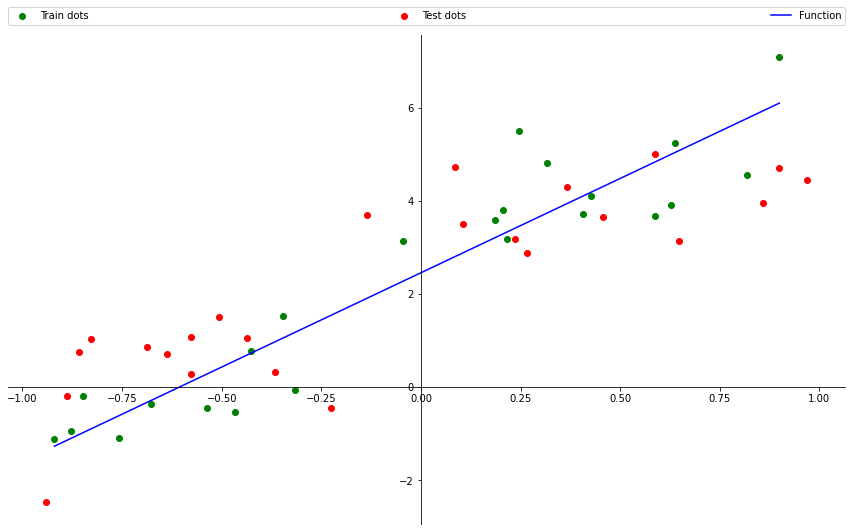

In [1120]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplot_mosaic([['top', 'top']])

fig.set_size_inches(15, 9)
ax['top'].spines['left'].set_position(('data', 0))
ax['top'].spines['bottom'].set_position(('data', 0))
ax['top'].spines['top'].set_visible(False)
ax['top'].spines['right'].set_visible(False)

ax['top'].scatter(X_train, y_train, color="g", label="Train dots")
ax['top'].scatter(X_test, y_test, color="r", label="Test dots")
ax['top'].plot(X_train, y_result, color="b", label="Function")

ax['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=3, mode="expand", borderaxespad=0.)

plt.show()

**3.** Looking at the data, consider what degree of polynomial would best approximate this function in terms of minimizing the mean squared error on the training set. Find this polynomial and store its coefficients in the `poly_coef` array (lowest to highest). Be sure to justify the choice of the degree of the polynomial.

In [1121]:
# In i-th row - degrees of x_i from 0 to n - 1
# In i-th column - (i-1)-th degree of all x

def x_degrees(x, n):
    m = np.matrix(x).T.dot(np.matrix(np.ones(n)))
    return np.power(m, np.arange(n))

print(x_degrees([1, 2, 3], 5))

[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  4.  8. 16.]
 [ 1.  3.  9. 27. 81.]]


In [1122]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# Because we have only n dots, there is a polinomial which degree is n-1 or lower that contains all dots from training set.
# Because of that it's error will be 0 (for the training dots).

X = x_degrees(X_train, 23)
a, y_result_for_poly_coef = find_poly(X, y_train)
poly_coef_23 = np.array(a.A1)
print(poly_coef_23)

[ 8.96160097e-01 -1.06752450e+02 -4.81907551e+02  1.06620839e+04
  1.45383018e+04 -2.70081777e+05 -2.00627533e+05  3.18823504e+06
  1.86241455e+06 -2.05681437e+07 -1.18160661e+07  7.60781236e+07
  4.67264888e+07 -1.57193938e+08 -1.04618978e+08  1.51028676e+08
  1.06626036e+08  9.00395072e+06  1.30902845e+07 -1.31539894e+08
 -1.13947258e+08  7.17446602e+07  6.38027075e+07]


**4.** Draw it's graphic at the same plane with the dots $(x_i, y_i)$ from both sets

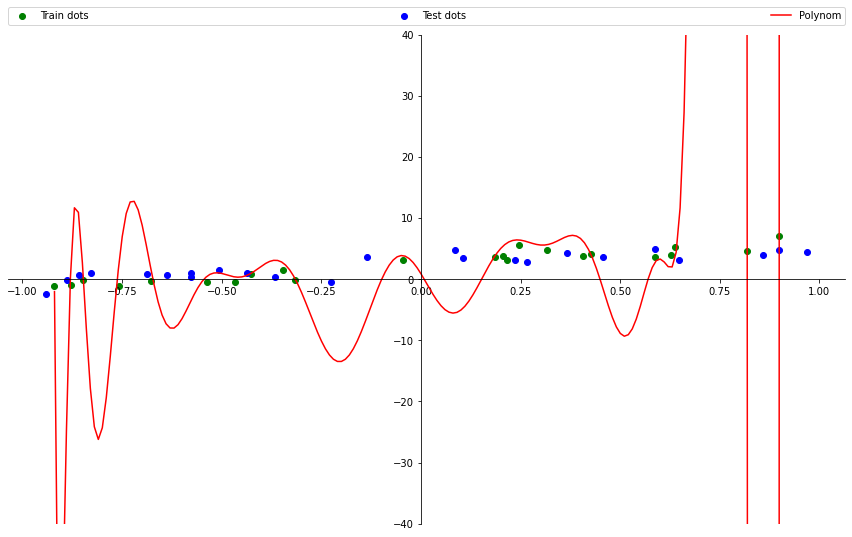

In [1123]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplot_mosaic([['top', 'top']])

fig.set_size_inches(15, 9)
ax['top'].spines['left'].set_position(('data', 0))
ax['top'].spines['bottom'].set_position(('data', 0))
ax['top'].spines['top'].set_visible(False)
ax['top'].spines['right'].set_visible(False)

ax['top'].scatter(X_train, y_train, color="g", label="Train dots")
ax['top'].scatter(X_test, y_test, color="b", label="Test dots")
x = np.arange(X_train[0], X_train[22] + 0.01, 0.01)
y = (np.matrix(x_degrees(x, 23))).dot(np.matrix(poly_coef_23).T)
ax['top'].plot(x, y, color="r", label="Polynom")

ax['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=3, mode="expand", borderaxespad=0.)
ax['top'].set_ylim([-40, 40])

plt.show()

# График не прошёл через все точки из-за вычислительных ошибок: у питона не бесконечная точность, а числа для х в
# больших степенях получаются очень маленькие

**5.** For $k = 1,2,3,\ldots,10$ find the polynomial $\hat{f}_k$ of degree $k$ that best approximates the unknown dependence. Store the found polynomial coefficients in the `poly_coefs` matrix.

In [1124]:
def new_poly_coefs(X_data, k, y_data):
    X = x_degrees(X_data, k + 2)
    a, y_result = find_poly(X, y_data)
    return np.array(a.A1)

In [1125]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

poly_coefs_train = np.zeros(11)
poly_coefs_test = np.zeros(11)
    

for k in range(10):
    poly_coefs_train = vstack([poly_coefs_train, hstack([new_poly_coefs(X_train, k, y_train), np.zeros(11 - (k + 2))])])
    poly_coefs_test = vstack([poly_coefs_test, hstack([new_poly_coefs(X_test, k, y_test), np.zeros(11 - (k + 2))])])

poly_coefs_train = np.delete(poly_coefs_train, (0), axis=0)
print("Polynomic coefs for train data:")
print(poly_coefs_train)
print("-" * 80)
poly_coefs_test = np.delete(poly_coefs_test, (0), axis=0)
print("Polynomic coefs for test data:")
print(poly_coefs_test)

Polynomic coefs for train data:
[[   2.45393223    4.04835608    0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   2.5694219     4.01015943   -0.3551553     0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   2.54688319    4.7869345    -0.41165762   -1.41634742    0.
     0.            0.            0.            0.            0.
     0.        ]
 [   3.25302411    4.49788737   -6.92753076   -0.76232916    7.97572932
     0.            0.            0.            0.            0.
     0.        ]
 [   3.11521784    6.42425264   -6.36050064  -11.18097856    7.592385
    10.50504691    0.            0.            0.            0.
     0.        ]
 [   3.07558089    6.47067818   -5.70379442  -11.41476149    5.49711076
    10.73774703    1.6944096     0.            0.            0.
     0.        ]
 [   3.14869778    5.21297457   -5.66934112    1.33536686    3.71785229
   -

Next you can see some graphics of the different degree polinoms to show how better the approximation becomes

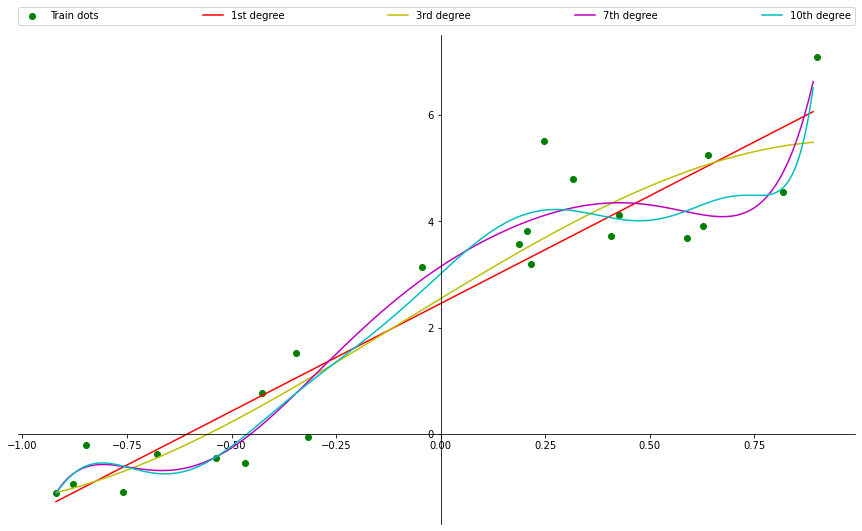

In [1127]:
# For training set

fig, ax = plt.subplot_mosaic([['top', 'top']])

fig.set_size_inches(15, 9)
ax['top'].spines['left'].set_position(('data', 0))
ax['top'].spines['bottom'].set_position(('data', 0))
ax['top'].spines['top'].set_visible(False)
ax['top'].spines['right'].set_visible(False)

ax['top'].scatter(X_train, y_train, color="g", label="Train dots")

x = np.arange(X_train[0], X_train[22], 0.01)
y = (np.matrix(x_degrees(x, 2))).dot(np.matrix(poly_coefs_train[0][:2]).T)
ax['top'].plot(x, y, color="r", label="1st degree")

y = (np.matrix(x_degrees(x, 4))).dot(np.matrix(poly_coefs_train[2][:4]).T)
ax['top'].plot(x, y, color="y", label="3rd degree")

y = (np.matrix(x_degrees(x, 8))).dot(np.matrix(poly_coefs_train[6][:8]).T)
ax['top'].plot(x, y, color="m", label="7th degree")

y = (np.matrix(x_degrees(x, 11))).dot(np.matrix(poly_coefs_train[9]).T)
ax['top'].plot(x, y, color="c", label="10th degree")

ax['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=5, mode="expand", borderaxespad=0.)

plt.show()

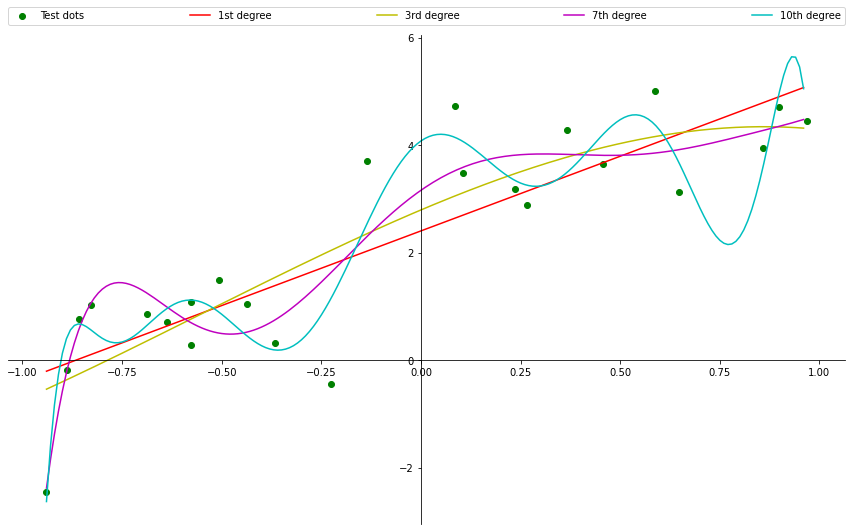

In [1128]:
# For test dots

fig, ax = plt.subplot_mosaic([['top', 'top']])

fig.set_size_inches(15, 9)
ax['top'].spines['left'].set_position(('data', 0))
ax['top'].spines['bottom'].set_position(('data', 0))
ax['top'].spines['top'].set_visible(False)
ax['top'].spines['right'].set_visible(False)

ax['top'].scatter(X_test, y_test, color="g", label="Test dots")

x = np.arange(X_test[0], X_test[23], 0.01)
y = (np.matrix(x_degrees(x, 2))).dot(np.matrix(poly_coefs_test[0][:2]).T)
ax['top'].plot(x, y, color="r", label="1st degree")

y = (np.matrix(x_degrees(x, 4))).dot(np.matrix(poly_coefs_test[2][:4]).T)
ax['top'].plot(x, y, color="y", label="3rd degree")

y = (np.matrix(x_degrees(x, 8))).dot(np.matrix(poly_coefs_test[6][:8]).T)
ax['top'].plot(x, y, color="m", label="7th degree")

y = (np.matrix(x_degrees(x, 11))).dot(np.matrix(poly_coefs_test[9]).T)
ax['top'].plot(x, y, color="c", label="10th degree")

ax['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=5, mode="expand", borderaxespad=0.)

plt.show()

**6.** For each of the polynomials from task 1.5, as well as for the polynomial from task 1.4, find the standard error on the training data and on the test data: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k (x_i) - y_i \right)^2$. Save the resulting error values in the `errors` matrix with a height of 11 and a width of 2. The first column of the matrix should contain the error values for the training data, and the second column for the test data. The first 10 lines of the matrix should contain error values for polynomials of the corresponding degrees from task 1.5, in the 11th line --- the error value for the polynomial from task 1.4.

$poly_{ij}$ - coefficent for $x^j$ in polinom with degree $i$


$poly.T_{ij}$ - coefficent for $x^i$ in polinom with degree $j$. Then in $poly.T$ $j$-th column - coefficents for polinom with degree $j$.

In $X$ $i$-th row - $x_i$ in degrees from 0 to 10

$M_{ij} = \sum (x_{ik} * poly.T_{kj}) = \sum((x_i)^k$ * coef for $x^k)$ - get $\hat{f}_j(x_i)$.

In $Y$ in i-th row there are $y_i$. Therefore, to get $(\hat{f}_j(x_i) - y_i)$, we need to substract $Y$ from $M$. Get $M1$. Next in $S$ calculating sum of squares $(\hat{f}_j(x_i) - y_i)^2$. Do this for test and training sets

In [1129]:
def find_error(X_data, poly_coefs, y, degree):
    X = x_degrees(X_data, degree)
    M = X.dot(np.matrix(poly_coefs).T)
    Y = np.matrix(y).T.dot(np.matrix(np.ones(poly_coefs.shape[0])))
    M1 = M - Y
    S = np.sum(np.multiply(M1, M1), axis=0)
    return S

In [1130]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

S_test = find_error(X_test, poly_coefs_test, y_test, 11) / X_test.size
S_train = find_error(X_train, poly_coefs_train, y_train, 11) / X_train.size

errors = np.concatenate((S_train.T, S_test.T), axis=1)

S_test_23 = find_error(X_test, poly_coef_23, y_test, 23) / X_test.size
S_train_23 = find_error(X_train, poly_coef_23, y_train, 23) / X_train.size

errors = vstack([errors, hstack([S_train_23[0, 0], S_test_23[0, 0]])])
print(errors)

[[7.00912588e-01 1.05216251e+00]
 [6.91992919e-01 9.52440168e-01]
 [6.53662070e-01 9.42944657e-01]
 [4.52989800e-01 9.38823055e-01]
 [3.69973832e-01 7.29951441e-01]
 [3.69614394e-01 5.80591914e-01]
 [3.54844465e-01 5.63643513e-01]
 [3.52453365e-01 5.58516976e-01]
 [3.38277875e-01 5.55777031e-01]
 [3.32784411e-01 3.63387837e-01]
 [3.04666504e+00 3.33429887e+10]]


**7.** For $k = 1,2,3,4,6$, plot the obtained polynomials on one drawing along with the points $(x_i, y_i)$ from both samples

In [1131]:
color_dots = [
    "#1631fa",
    "#8de969",
    "#c21d1d",
    "#ffe500",
    "#540d6e",
    "#313638",
    "#ff0000",
    "#fe64a3",
    "#2e0014",
    "#f5b278",
]

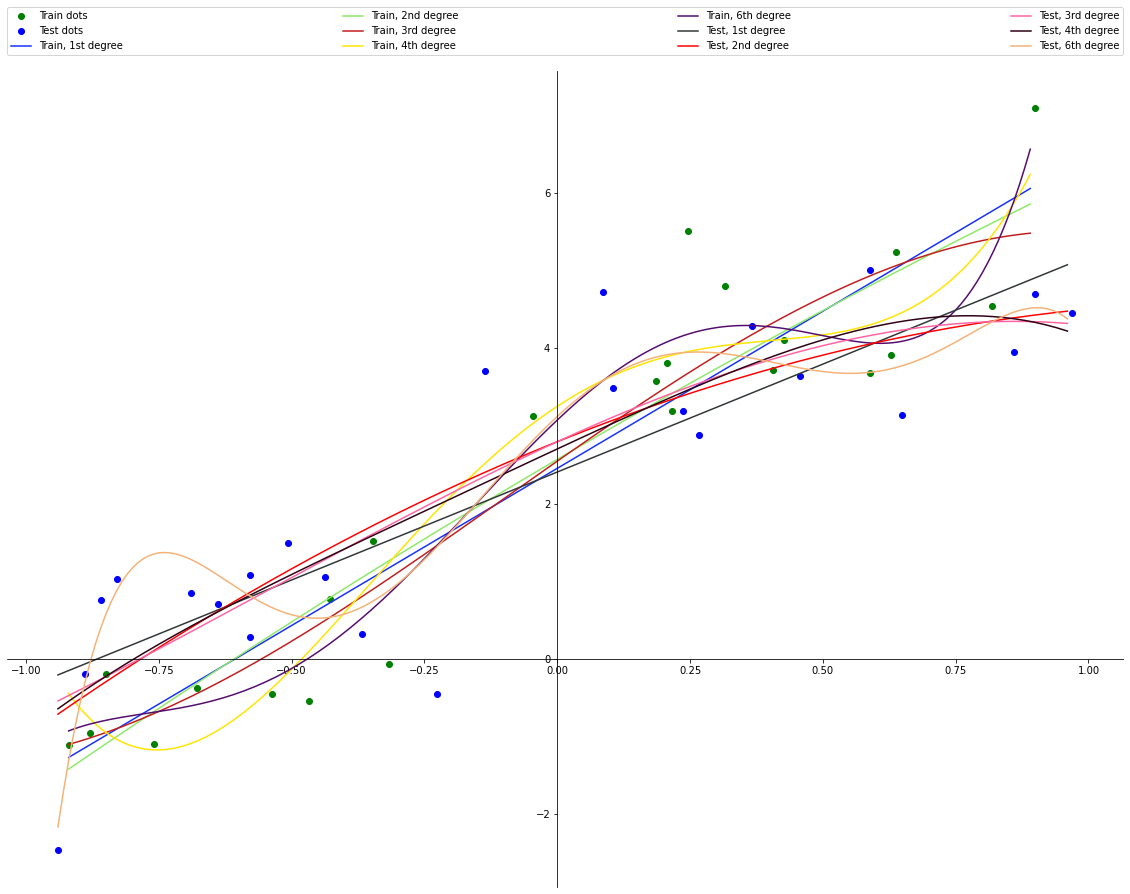

In [1132]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplot_mosaic([['top', 'top']])

fig.set_size_inches(20, 15)
ax['top'].spines['left'].set_position(('data', 0))
ax['top'].spines['bottom'].set_position(('data', 0))
ax['top'].spines['top'].set_visible(False)
ax['top'].spines['right'].set_visible(False)

ax['top'].scatter(X_train, y_train, color="g", label="Train dots")
ax['top'].scatter(X_test, y_test, color="b", label="Test dots")

x = np.arange(X_train[0], X_train[22], 0.01)
y = (np.matrix(x_degrees(x, 2))).dot(np.matrix(poly_coefs_train[0][:2]).T)
ax['top'].plot(x, y, color=color_dots[0], label="Train, 1st degree")

y = (np.matrix(x_degrees(x, 3))).dot(np.matrix(poly_coefs_train[1][:3]).T)
ax['top'].plot(x, y, color=color_dots[1], label="Train, 2nd degree")

y = (np.matrix(x_degrees(x, 4))).dot(np.matrix(poly_coefs_train[2][:4]).T)
ax['top'].plot(x, y, color=color_dots[2], label="Train, 3rd degree")

y = (np.matrix(x_degrees(x, 5))).dot(np.matrix(poly_coefs_train[3][:5]).T)
ax['top'].plot(x, y, color=color_dots[3], label="Train, 4th degree")

y = (np.matrix(x_degrees(x, 7))).dot(np.matrix(poly_coefs_train[5][:7]).T)
ax['top'].plot(x, y, color=color_dots[4], label="Train, 6th degree")


x = np.arange(X_test[0], X_test[23], 0.01)
y = (np.matrix(x_degrees(x, 2))).dot(np.matrix(poly_coefs_test[0][:2]).T)
ax['top'].plot(x, y, color=color_dots[5], label="Test, 1st degree")

y = (np.matrix(x_degrees(x, 3))).dot(np.matrix(poly_coefs_test[1][:3]).T)
ax['top'].plot(x, y, color=color_dots[6], label="Test, 2nd degree")

y = (np.matrix(x_degrees(x, 4))).dot(np.matrix(poly_coefs_test[2][:4]).T)
ax['top'].plot(x, y, color=color_dots[7], label="Test, 3rd degree")

y = (np.matrix(x_degrees(x, 5))).dot(np.matrix(poly_coefs_test[3][:5]).T)
ax['top'].plot(x, y, color=color_dots[8], label="Test, 4th degree")

y = (np.matrix(x_degrees(x, 7))).dot(np.matrix(poly_coefs_test[5][:7]).T)
ax['top'].plot(x, y, color=color_dots[9], label="Test, 6th degree")

ax['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=4, mode="expand", borderaxespad=0.)

plt.show()

When the degree of the polynomial increases, the model is overfitted - it adjusts exactly to the data that is given to it (i.e., to training). But for test data, this polynomial is already poorly suited - it is too specific. Therefore, such a huge error is obtained with large degrees (this can be seen in errors in the last line)

## Part 2: Machine learning

### Task 2. Linear regression

Download data

In [1133]:
data = np.loadtxt("diamonds_features.csv", delimiter=",", dtype="str")[1:, :]
X_test_test = np.loadtxt("diamonds_test.csv", delimiter=",", dtype="str")[1:, :]
print(data[:5, :])
print(data.shape)

[['0.8' 'Ideal' 'F' 'VS1' '62.4' '55.0' '5.92' '5.88' '3.68' '3884']
 ['0.91' 'Premium' 'F' 'SI2' '61.4' '60.0' '6.23' '6.21' '3.82' '3618']
 ['1.28' 'Premium' 'I' 'VS2' '61.7' '60.0' '7.05' '6.95' '4.32' '6762']
 ['0.41' 'Very Good' 'F' 'SI1' '61.9' '55.0' '4.78' '4.81' '2.97' '769']
 ['1.07' 'Premium' 'F' 'SI2' '61.8' '59.0' '6.53' '6.57' '4.05' '4560']]
(37758, 10)


In [1134]:
data = np.unique(data, axis=0)
data.shape

(37685, 10)

### Numeric features

In [1135]:
numeric_features = [0, 4, 5, 6, 7, 8]
categorical_features = [1, 2, 3]

In [1136]:
X = data[:,0:9]
y = data[:,9].astype(float)

print(X[:5, :])
print("-" * 80)
print(y[:5])

[['0.2' 'Ideal' 'D' 'VS2' '61.5' '57.0' '3.81' '3.77' '2.33']
 ['0.2' 'Ideal' 'E' 'VS2' '59.7' '55.0' '3.86' '3.84' '2.3']
 ['0.2' 'Ideal' 'E' 'VS2' '62.2' '57.0' '3.76' '3.73' '2.33']
 ['0.2' 'Premium' 'D' 'VS2' '61.7' '60.0' '3.77' '3.72' '2.31']
 ['0.2' 'Premium' 'E' 'SI2' '60.2' '62.0' '3.79' '3.75' '2.27']]
--------------------------------------------------------------------------------
[367. 367. 367. 367. 345.]


In [1137]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)
data_test = np.column_stack([X_test, y_test])
data_train = np.column_stack([X_train, y_train])
print(X_test)
print(X_test.shape)
print(y_train)
print(y_train.shape)

[['2.01' 'Premium' 'G' ... '8.21' '8.15' '4.89']
 ['2.03' 'Ideal' 'J' ... '8.06' '8.12' '5.02']
 ['0.4' 'Good' 'F' ... '4.67' '4.7' '2.98']
 ...
 ['0.4' 'Very Good' 'J' ... '4.7' '4.69' '2.98']
 ['0.9' 'Very Good' 'E' ... '6.31' '6.35' '3.76']
 ['0.72' 'Very Good' 'E' ... '5.66' '5.71' '3.56']]
(11306, 9)
[ 1608.   730.  4102. ... 14893.  3447.   891.]
(26379,)


In [1138]:
print(data_test.shape, data_train.shape)

(11306, 10) (26379, 10)


In [1139]:
numeric_data = data[:, numeric_features].astype(float)
categorical_data = data[:, categorical_features]

In [1140]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_numeric_test = X_test[:, numeric_features].astype(float)
X_numeric_train = X_train[:, numeric_features].astype(float)
X_categorical_test = X_test[:, categorical_features]
X_categorical_train = X_train[:, categorical_features]
X_test_test_numeric = X_test_test[:, numeric_features].astype(float)
X_test_test_categorical = X_test_test[:, categorical_features]
print(numeric_data)
print()
print(X_numeric_train)

[[ 0.2  61.5  57.    3.81  3.77  2.33]
 [ 0.2  59.7  55.    3.86  3.84  2.3 ]
 [ 0.2  62.2  57.    3.76  3.73  2.33]
 ...
 [ 4.01 62.5  62.   10.02  9.94  6.24]
 [ 4.13 64.8  61.   10.    9.85  6.43]
 [ 4.5  65.8  58.   10.23 10.16  6.72]]

[[ 0.57 59.7  59.    5.37  5.41  3.22]
 [ 0.32 60.8  59.    4.41  4.44  2.69]
 [ 1.2  61.8  56.    6.81  6.85  4.22]
 ...
 [ 1.71 61.2  62.    7.59  7.65  4.66]
 [ 0.9  61.   59.    6.11  6.16  3.74]
 [ 0.33 61.8  55.    4.47  4.46  2.76]]


**1.** Solve a linear regression problem to predict the price of a diamond based on its numeric features

In [1141]:
def find_error2(X, poly_coefs, y):
    M = X.dot(np.matrix(poly_coefs))
    Y = np.matrix(y).T.dot(np.matrix(np.ones(poly_coefs.shape[0])))
    M1 = M - Y
    S = np.sum(np.multiply(M1, M1), axis=0)
    return S[0, 0] / X.shape[0]

In [1142]:
def print_learned_model(X_test, X_train, y_test, y_train):
    coefs, y_train_result = find_poly(hstack([X_train, np.matrix(np.ones(X_train.shape[0])).T]), y_train)
    print("Coefs:")
    print(coefs)
    error_train = find_error2(hstack([X_train, np.matrix(np.ones(X_train.shape[0])).T]), coefs, y_train)
    print("Error for train:", error_train)
    error_test = find_error2(hstack([X_test, np.matrix(np.ones(X_test.shape[0])).T]), coefs, y_test)
    print("Error for test: ", error_test)
    return coefs

In [1143]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

coefs_numeric = print_learned_model(X_numeric_test, X_numeric_train, y_test, y_train)
print("Price = {0} * carat + {1} * depth + {2} * table + {3} * x + {4} * y + {5} * z + {6}".format(
       coefs_numeric[0, 0], coefs_numeric[1, 0], coefs_numeric[2, 0], coefs_numeric[3, 0], coefs_numeric[4, 0], coefs_numeric[5, 0], coefs_numeric[6, 0])
      )

Coefs:
[[ 1.13716307e+04]
 [-2.15131267e+02]
 [-1.02992221e+02]
 [-1.54181436e+03]
 [ 1.73458321e+01]
 [ 5.51262268e+01]
 [ 2.26089053e+04]]
Error for train: 2180795.3703483096
Error for test:  2339297.4114843193
Price = 11371.630674613882 * carat + -215.1312665465497 * depth + -102.9922211159278 * table + -1541.8143554856708 * x + 17.345832123873503 * y + 55.126226757699534 * z + 22608.90530934994


It is clear that the greater the weight of a diamond, the more it costs, and, given that the weight is usually quite small, and the price is high, then the coefficient will be large for the weight. It is clear why the free member is large - it's just a big markup for being such a rare, beautiful and popular stone as a diamond (conditionally markup "for the brand"). Depth - apparently, this is an indicator of how "irregular" the shape of our diamond. And apparently the greater the depth, the more the shape is "wrong", so there is a negative coefficient near depth. Similarly for table. About x, y, z, I can only say that apparently y and z are not very important (since the modulus of the coefficient is quite small), and the better the diamond is, the less x it has

It seems to me that the situation with large coefficients is undesirable, because with a small difference in features, the difference in the final values will be large. For example, if we have two diamonds that are the same in everything but weight (one has 1 carat more weight than the other, that is, 0.2 g in total), then the difference in price between them will be more than $11,000. It is clear that if you think sensibly, then if the price should differ, then obviously not so much, but at least an order of magnitude less

**3.** Draw a histogram that characterizes the distribution of the variable being explained in the training sample.

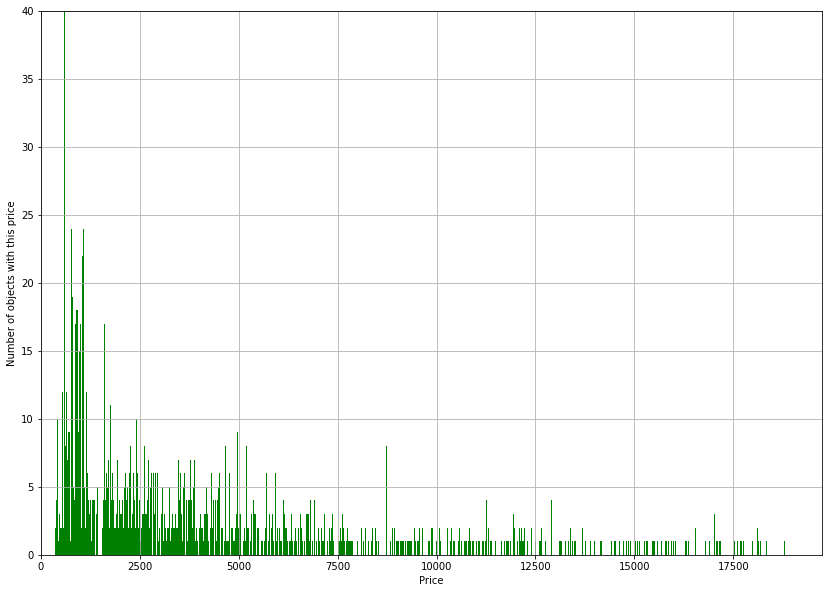

In [1144]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

y_count = dict()
for price in y_train:
    if price not in y_count:
        y_count[price] = 0
    y_count[price] += 1

width=[1.5]*len(y_count)
plt.bar(x=list(y_count.keys()), height=list(y_count.values()), width=width, color='g')

plt.xlabel('Price')
plt.ylabel('Number of objects with this price')
plt.xlim(0)
plt.ylim(0, 40)
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(14, 10)

plt.show()

**4.** Take the logarithm of the target variable and plot the distribution of the logarithmic target.

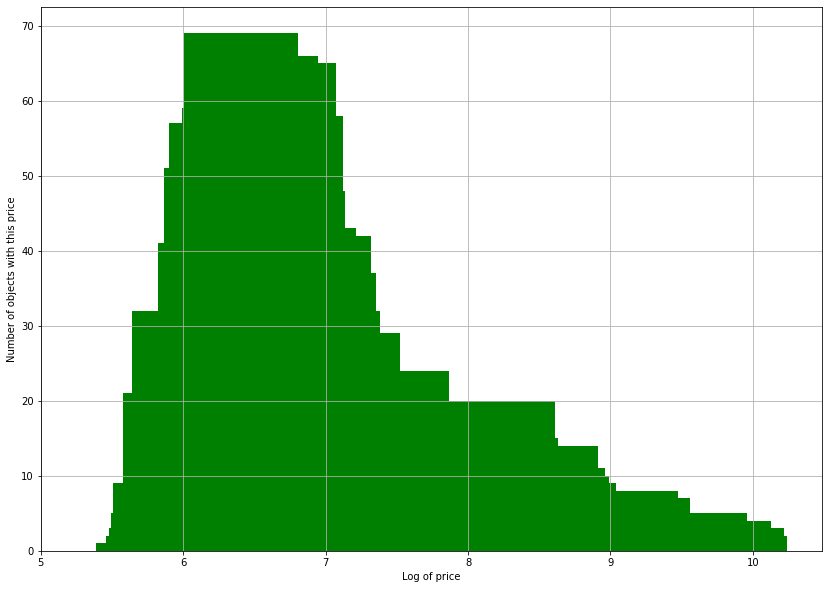

In [1145]:
price_log = dict()
for price in y_count:
    price_log[log(price)] = y_count[price]

plt.bar(x=list(price_log.keys()), height=list(price_log.values()), color='g', linewidth=0.2, width=0.8)

plt.xlabel('Log of price')
plt.ylabel('Number of objects with this price')
plt.xlim(5)
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(14, 10)

plt.show()   

Perhaps the "heavy tail" is not very desirable in models because the values of the variable in this tail are very close to each other, so it's really worth just considering that from some point on the values decrease linearly or even become a constant (depends on situation), instead of looking for some complex dependency that can spoil the dependency that was before the start of the "tail"

Train your model again based on the logarithmic target.

In [1146]:
def find_error3(X, poly_coefs, y_answer):
    M = np.exp(X.dot(np.matrix(poly_coefs)))
    Y = np.matrix(y_answer).T.dot(np.matrix(np.ones(poly_coefs.shape[0])))
    M1 = M - Y
    S = np.sum(np.multiply(M1, M1), axis=0)
    return S[0, 0] / X.shape[0]

In [1147]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

y_log_train = np.log(y_train)
y_log_test = np.log(y_test)

coefs_log, y_log_train_result = find_poly(hstack([X_numeric_train, np.matrix(np.ones(X_numeric_train.shape[0])).T]), y_log_train)
print("Coefs:")
print(coefs_log)
print("Log of price = {0} * carat + {1} * depth + {2} * table + {3} * x + {4} * y + {5} * z + {6}".format(
       coefs_log[0, 0], coefs_log[1, 0], coefs_log[2, 0], coefs_log[3, 0], coefs_log[4, 0], coefs_log[5, 0], coefs_log[6, 0])
      )
error_log_train = find_error3(hstack([X_numeric_train, np.matrix(np.ones(X_numeric_train.shape[0])).T]), coefs_log, y_train)
print("Error for train:", error_log_train)
error_log_test = find_error3(hstack([X_numeric_test, np.matrix(np.ones(X_numeric_test.shape[0])).T]), coefs_log, y_test)
print("Error for test: ", error_log_test)

Coefs:
[[-0.85543159]
 [ 0.02516602]
 [-0.01033943]
 [ 1.18220157]
 [ 0.01834128]
 [ 0.04668059]
 [ 0.46324937]]
Log of price = -0.8554315890279867 * carat + 0.025166021023832436 * depth + -0.01033942818720604 * table + 1.1822015699502915 * x + 0.018341275669767867 * y + 0.046680585486690705 * z + 0.4632493740523694
Error for train: 2607511.5183569673
Error for test:  2639004.721260173


Previous:

    Error for train: 2180795.3703483096

    Error for test:  2339297.4114843193
      
Current:

    Error for train: 2607511.5183569673

    Error for test:  2639004.721260173
       
The error got bigger, but the tail got a lot smaller, but I don't think this really improved the model much (because our goal seems to be to reduce the error anyway)

### Categorical features

**5.** Use `OrdinalEncoder` of `sklearn` to encode the categorical features. Train the model based on them and test it.

In [1148]:
from sklearn.preprocessing import OrdinalEncoder

X_cat_num_train = np.copy(X_categorical_train)
X_cat_num_test = np.copy(X_categorical_test)
enc = OrdinalEncoder()
X_cat_num_test = enc.fit_transform(X_cat_num_test)
X_cat_num_train = enc.fit_transform(X_cat_num_train)

In [1149]:
coefs_cat_num = print_learned_model(X_cat_num_test, X_cat_num_train, y_test, y_train)
print("Price = {0} * cut + {1} * color + {2} * clarity + {3}".format(
       coefs_cat_num[0, 0], coefs_cat_num[1, 0], coefs_cat_num[2, 0], coefs_cat_num[3, 0])
     )

Coefs:
[[ 160.16711132]
 [ 399.5421452 ]
 [-138.59233636]
 [3015.76577312]]
Error for train: 15312643.25264289
Error for test:  15251532.579678217
Price = 160.16711132385805 * cut + 399.54214520336905 * color + -138.59233635561438 * clarity + 3015.765773122139


Encoding problems - depending on the numerical representation of the category. For example, if we change the values ​​of some two colors in the attribute "color", then the coefficients of the categories will change. For example: let there be a diamond A = ("Fair", "D", "I1") with a price of $price_A = 160 * 0 + 399 * 0 - 138 * 0 + 3015 = $3015. It was encoded as (0, 0, 0) for example. And there was diamond B = ("Fair", "H", I1"), with price $price_B = 160 * 0 + 399 * 4 - 138 * 0 + 3015 = 4611$, which was coded as (0, 4, 0) Then if we change the encoding for the colors "H" and "D", then the coefficients for the categories will also change (because if they remain, the resulting price will not correspond to the real one at all.) But not just the coefficients will change, but their ratios, that is, one category will become more important (weight more) than it was before, and the other, on the contrary, less important.But, of course, the importance of features should not depend on how we coded the categories.

**6.** Use `OneHotEncoder` of `sklearn` to encode categorical features. Train the model based on them and test it.

In [1150]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = np.column_stack([np.ones(len(X_categorical_train)), enc.fit_transform(X_categorical_train).toarray()])
X_test_ohe = np.column_stack([np.ones(len(X_categorical_test)), enc.fit_transform(X_categorical_test).toarray()])

poly_coefs_ohe = find_poly(X_train_ohe, y_train)[0]
print("Coefs:\n", poly_coefs_ohe)
print("Test erorr: ", find_error2(X_test_ohe, poly_coefs_ohe, y_test))
print("Train error:", find_error2(X_train_ohe, poly_coefs_ohe, y_train))

Coefs:
 [[-292161.97460938]
 [ 138621.77294922]
 [ 150388.76025391]
 [  97302.18652344]
 [ 145959.11328125]
 [ 151814.05175781]
 [ 325412.421875  ]
 [ 204334.63671875]
 [ 123822.73995972]
 [ 168702.68945312]
 [ 217546.17382812]
 [ 245689.46777344]
 [ 116350.00244141]
 [ -46320.74728394]
 [ -79845.17041016]
 [ -89327.45654297]
 [-100102.46777344]
 [ -71897.40283203]
 [ -58016.39593506]
 [ -37901.30078125]
 [  -6455.27978516]]
Test erorr:  6367387224.633668
Train error: 6251005898.243563


The error became noticeably larger by several orders of magnitude. But in this method, the quality of the model does not depend on coding (in the sense of how we encoded, because there is only one option). But in this method, we need a lot more memory to store the data, and, accordingly, the model will take longer to train.

**7.** Train a linear model on all the data, performing all necessary transformations.

In [1153]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X_train_all = np.column_stack([np.ones(len(X_categorical_train)), enc.fit_transform(X_categorical_train), X_numeric_train])
X_test_all = np.column_stack([np.ones(len(X_categorical_test)), enc.fit_transform(X_categorical_test), X_numeric_test])
poly_coefs_all = find_poly(X_train_all, y_train)[0]
print("Coefs:\n", poly_coefs_all)
print("Test erorr: ", find_error2(X_test_all, poly_coefs_all, y_test))
print("Train error:", find_error2(X_train_all, poly_coefs_all, y_train))


Coefs:
 [[ 1.79064278e+04]
 [ 7.58684481e+01]
 [-2.69633752e+02]
 [ 2.87621748e+02]
 [ 1.16930773e+04]
 [-1.67663466e+02]
 [-9.40262007e+01]
 [-1.43868088e+03]
 [ 6.52747454e+00]
 [ 2.04177811e+01]]
Test erorr:  1921575.4083945344
Train error: 1763324.166129563


### Feature engineering

**8.** Draw graphs showing the price of a diamond as a function of weight, lenght, width and depth

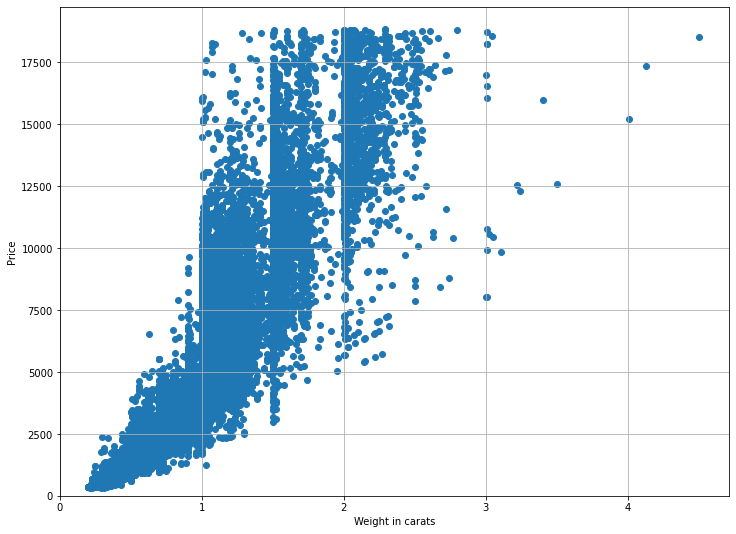

In [252]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()
ax.scatter(list(numeric_data[:,0]), list(y))
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.xlabel("Weight in carats")
plt.ylabel("Price")
plt.ylim(0)
plt.xlim(0)
plt.grid(True)

plt.show()

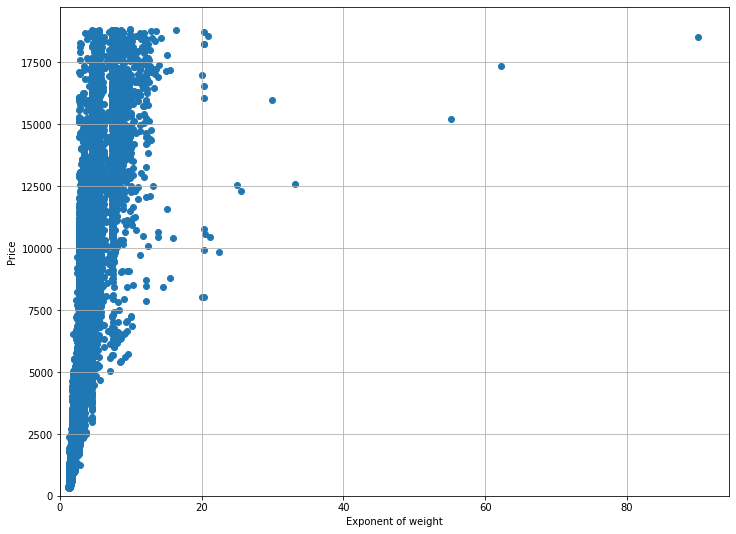

In [253]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()
ax.scatter(np.exp(list(numeric_data[:,0])), list(y))
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.xlabel("Exponent of weight")
plt.ylabel("Price")
plt.ylim(0)
plt.xlim(0)
plt.grid(True)

plt.show()

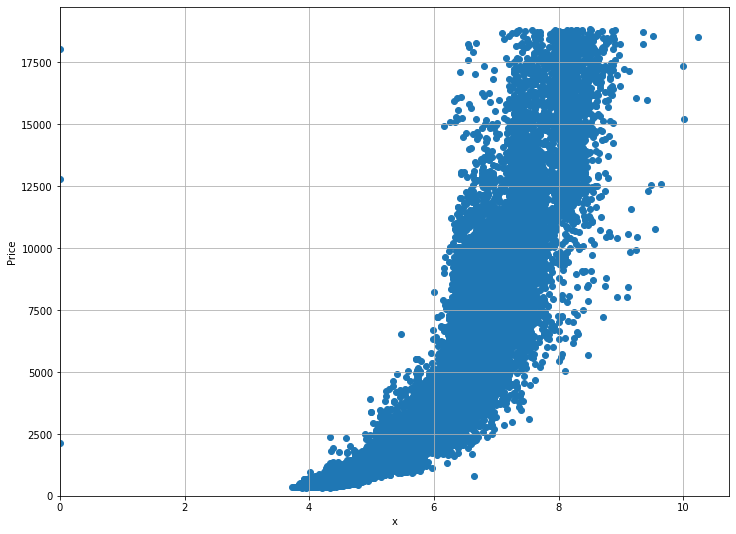

In [254]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()

ax.scatter(list(numeric_data[:,3]), list(y))
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.xlabel("x")
plt.ylabel("Price")
plt.ylim(0)
plt.xlim(0)
plt.grid(True)

plt.show()

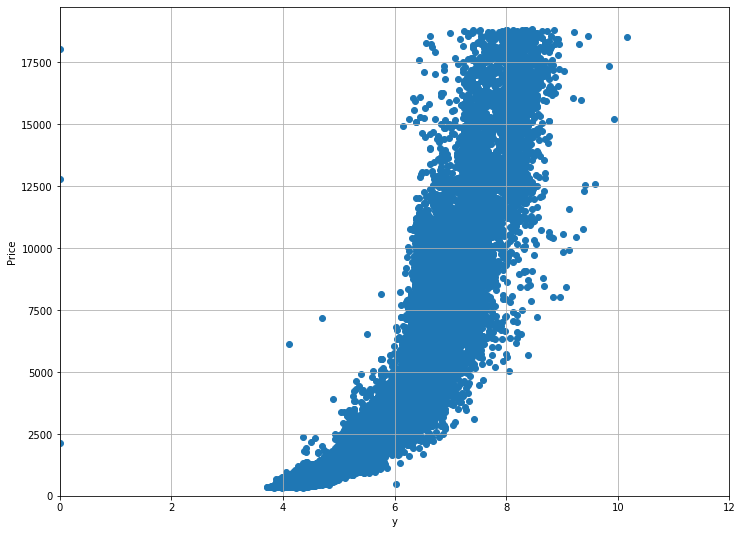

In [255]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()

ax.scatter(list(numeric_data[:,4]), list(y))
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.xlabel("y")
plt.ylabel("Price")
plt.ylim(0)
plt.xlim(0, 12)
plt.grid(True)

plt.show()

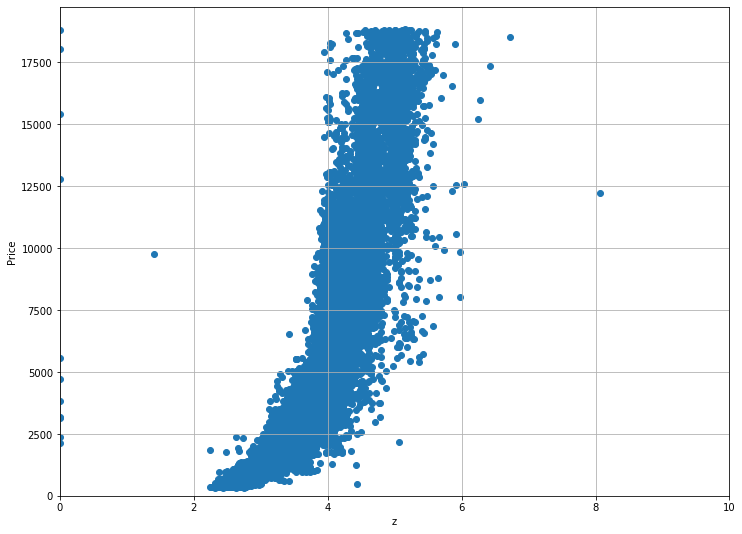

In [256]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()

ax.scatter(list(numeric_data[:,5]), list(y))
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.xlabel("z")
plt.ylabel("Price")
plt.ylim(0)
plt.xlim(0, 10)
plt.grid(True)

plt.show()

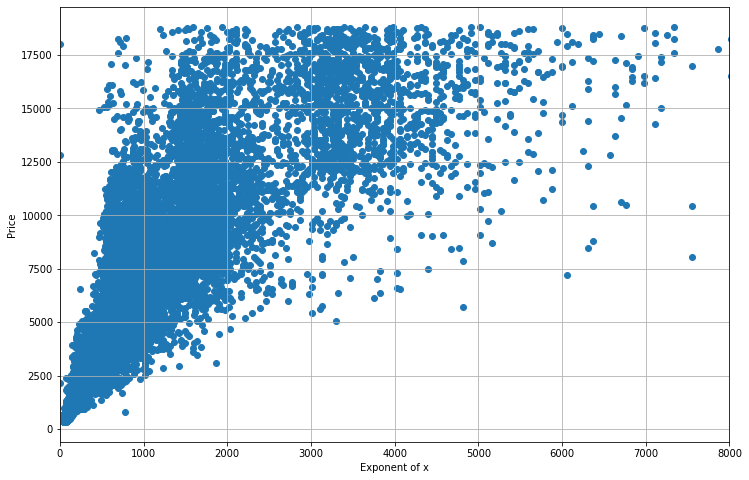

In [257]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()

plt.scatter(np.exp(numeric_data[:,3]), y)
fig.set_size_inches(12, 8)
plt.xlim(0, 8000)
plt.xlabel("Exponent of x")
plt.ylabel("Price")
plt.grid(True)

plt.show()

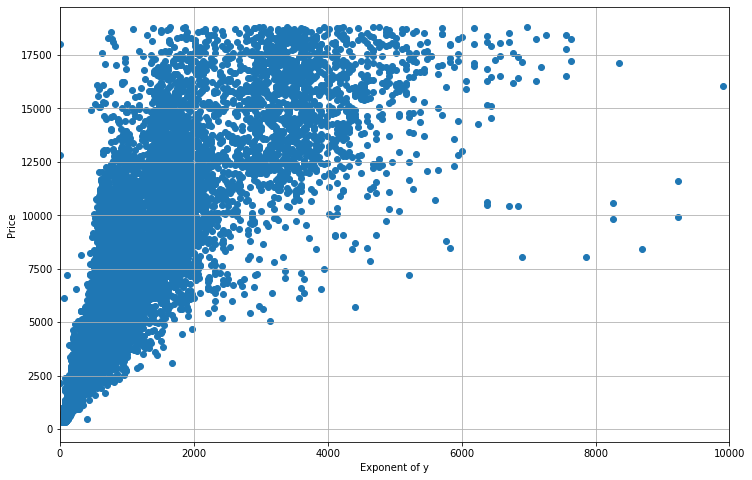

In [258]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()

plt.scatter(np.exp(numeric_data[:,4]), y)
fig.set_size_inches(12, 8)
plt.xlim(0, 10000)
plt.xlabel("Exponent of y")
plt.ylabel("Price")
plt.grid(True)

plt.show()

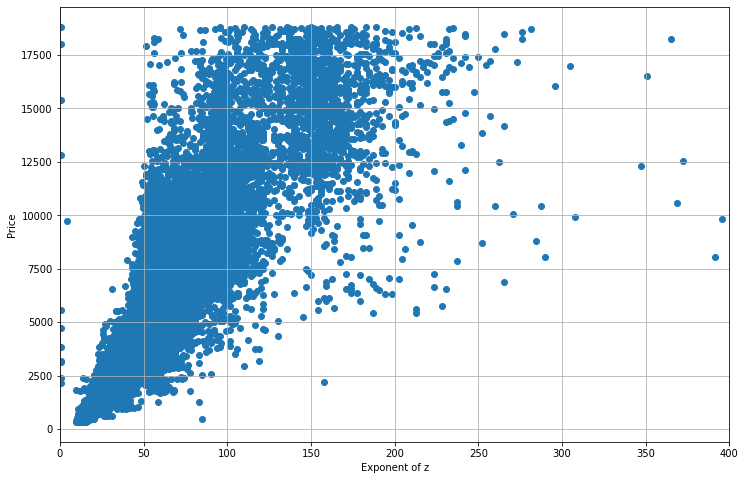

In [259]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()

plt.scatter(np.exp(numeric_data[:,5]), y)
fig.set_size_inches(12, 8)
plt.xlim(0, 400)
plt.xlabel("Exponent of z")
plt.ylabel("Price")
plt.grid(True)

plt.show()

You can raise the signs to some degree, because it is clear that the dependences on length, width and depth are exponential. The dependence on weight is already almost linear

In [1159]:
# Let's compare what data the model trains better on, and see what is better when it trains on the exponent 
# of the data, that is, when the dependence on the data is linear

X_exp_test = np.column_stack([np.exp(X_numeric_test[:, [3, 4, 5]]), np.ones(X_test.shape[0]).T])
X_exp_train = np.column_stack([np.exp(X_numeric_train[:, [3, 4, 5]]), np.ones(X_train.shape[0]).T])

poly1, y_result1 = find_poly(X_exp_train, y_train)
error1 = find_error2(X_exp_test, poly1, y_test)
print("Error with exponent:    ", error1)

X_2_test = X_numeric_test[:, [3, 4, 5]]
X_2_train = X_numeric_train[:, [3, 4, 5]]
poly2, y_result2 = find_poly(X_2_train, y_train)
error2 = find_error2(X_2_test, poly2, y_test)
print("Error without exponent:", error2)

Error with exponent:     6120781.048914708
Error without exponent: 10761293.83491733


**9.** In one figure, plot the dependence of the target variable on the feature depth and plot the dependence of the target variable on the feature table.

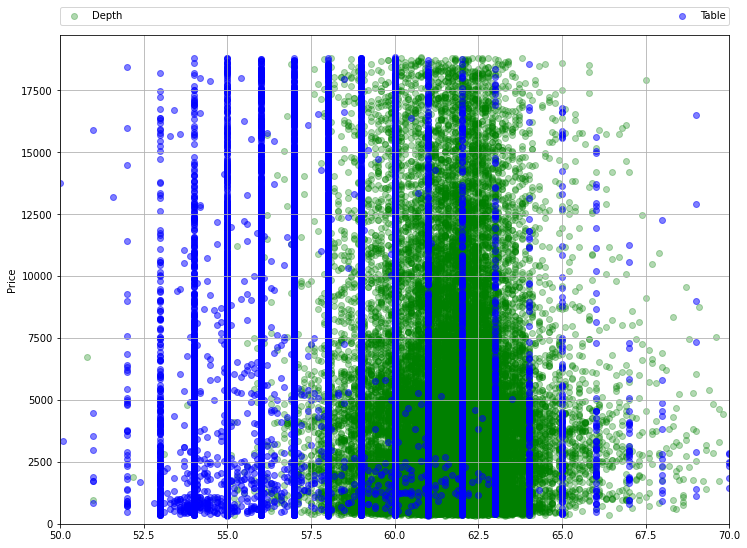

In [1160]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()

ax.scatter(numeric_data[:,1], y, color="g", alpha=0.3, label="Depth")
ax.scatter(numeric_data[:, 2], y, color="b", alpha=0.5, label="Table")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel("Price")
plt.ylim(0)
plt.xlim(50, 70)
plt.grid(True)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=2, mode="expand", borderaxespad=0.)

plt.show()

# We can see that all diamonds pretty clear split by the "table" feature

**10.** Train a linear model that predicts the price of diamonds on x, y, z features from our data. Measure the quality of the resulting linear model on the test set, then add the feature $\tau = \frac{x}{2} + 4y - z + 1$, and train the linear model again.

In [1161]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X_xyz_test = X_test[:, [6, 7, 8]].astype(float)
X_xyz_train = X_train[:, [6, 7, 8]].astype(float)

coefs_xyz = print_learned_model(X_xyz_test, X_xyz_train, y_test, y_train)

Coefs:
[[  2925.36509697]
 [   128.34485882]
 [   174.56860503]
 [-14189.11106964]]
Error for train: 3424745.359253595
Error for test:  3489991.953511153


In [1162]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

t_test = 1/2 * X_xyz_test[:, 0] + 4 * X_xyz_test[:, 1] - X_xyz_test[:, 2] + np.ones(X_xyz_test.shape[0])
t_train = 1/2 * X_xyz_train[:, 0] + 4 * X_xyz_train[:, 1] - X_xyz_train[:, 2] + np.ones(X_xyz_train.shape[0])
X_xyzt_test = np.column_stack([X_xyz_test, np.matrix(t_test).T])
X_xyzt_train = np.column_stack([X_xyz_train, np.matrix(t_train).T])

coefs_xyzt = print_learned_model(X_xyzt_test, X_xyzt_train, y_test, y_train)

# Model without additional feature has much better quality

Coefs:
[[  3564.96961878]
 [  1647.05344868]
 [  -217.08666709]
 [  -441.40683219]
 [-13725.03690898]]
Error for train: 4883189.009844313
Error for test:  5010344.939764003


**11.** Train a linear model on 4 features: x, y, z, and the volume of a parallelepiped with sides (x, y, z).

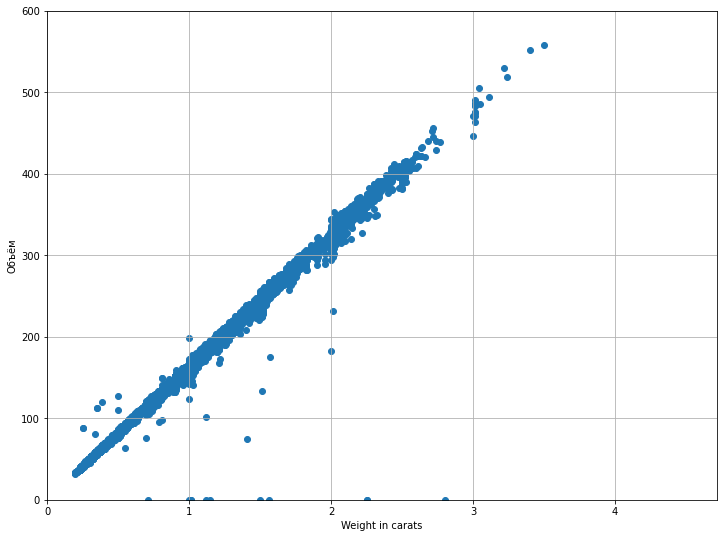

In [1166]:
v_test = np.matrix(X_numeric_test[:, 3] * X_numeric_test[:, 4] * X_numeric_test[:, 5])
v_train = np.matrix(X_numeric_train[:, 3] * X_numeric_train[:, 4] * X_numeric_train[:, 5])
v_all = vstack([v_test.T, v_train.T])

fig, ax = plt.subplots()
ax.scatter(list(hstack([X_numeric_test[:,0], X_numeric_train[:, 0]])), list(v_all))
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.xlabel("Weight in carats")
plt.ylabel("Volume")
plt.ylim(0, 600)
plt.xlim(0)
plt.grid(True)

plt.show()

In [1167]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

v_test = X_xyz_test[:, 0] * X_xyz_test[:, 1] * X_xyz_test[:, 2]
v_train = X_xyz_train[:, 0] * X_xyz_train[:, 1] * X_xyz_train[:, 2]
X_xyzv_test = np.column_stack([X_xyz_test, np.matrix(v_test).T])
X_xyzv_train = np.column_stack([X_xyz_train, np.matrix(v_train).T])

coefs_xyzv = print_learned_model(X_xyzv_test, X_xyzv_train, y_test, y_train)

Coefs:
[[ 4112.00198562]
 [-4383.68458687]
 [-1837.42982339]
 [   67.88671538]
 [ 3197.57405797]]
Error for train: 2332768.158295162
Error for test:  2428032.9281489314


Train the linear model again on 4 features: x, y, z and the volume of an ellipsoid with axes (x, y, z).

In [1168]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from math import pi

v1_test = 4/3 * pi * X_xyz_test[:, 0] * X_xyz_test[:, 1] * X_xyz_test[:, 2]
v1_train = 4/3 * pi * X_xyz_train[:, 0] * X_xyz_train[:, 1] * X_xyz_train[:, 2]
X_xyzv1_test = hstack([X_xyz_test, np.matrix(v1_test).T])
X_xyzv1_train = hstack([X_xyz_train, np.matrix(v1_train).T])

print_learned_model(X_xyzv1_test, X_xyzv1_train, y_test, y_train)

# The models turned out to be exactly the same. I think this is due to the fact that the volume of the parallelepiped and 
# the volume of the ellipsoid are different in a constant number of times, so for two diamonds the difference in these features 
# will be a constant, which, apparently, does not affect the model

Coefs:
[[ 4112.00198562]
 [-4383.68458687]
 [-1837.42982339]
 [   16.20675948]
 [ 3197.57405798]]
Error for train: 2332768.158295175
Error for test:  2428032.928148935


matrix([[ 4112.00198562],
        [-4383.68458687],
        [-1837.42982339],
        [   16.20675948],
        [ 3197.57405798]])

## Then we drow some graphics and make some calculations to decide what features should we add to our model. There are a lot of graphics, and to help you navigate look for "Model20" - it's my final model

**12.** Train a linear model predicting diamond price on categorical features from our data, then add features that clearly highlight diamonds that are likely to be priced high and diamonds that are likely to be priced low, and train the linear model again

y = x * 0.9952769106441197 + 0.0312357084202319


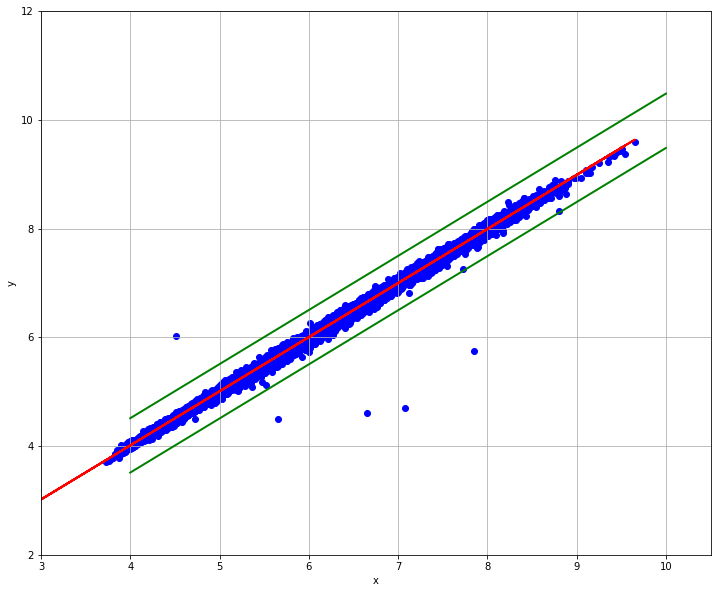

6009
['1.51' 'Fair' 'H' 'VS2' '65.6' '56.0' '7.08' '4.7' '4.0'] 7188.0
10641
['0.7' 'Premium' 'F' 'SI1' '62.6' '55.0' '5.65' '4.5' '3.0'] 2184.0
13806
['0.34' 'Good' 'E' 'VS2' '57.0' '61.0' '6.65' '4.61' '2.64'] 816.0
18940
['1.57' 'Fair' 'H' 'VS1' '67.3' '66.0' '7.85' '5.75' '3.87'] 8133.0


In [628]:
a, y_result = find_poly(np.column_stack([X_numeric_train[:, 3], np.matrix(np.ones(X_numeric_train.shape[0])).T]), X_numeric_train[:, 4])
print("y = x * {0} + {1}".format(a[0,0], a[1,0]))

fig, ax = plt.subplots()

x_add = x = np.linspace(4, 10, 1000)
y_add = a[0,0] * x_add + a[1, 0] - 0.5
y_add1 = a[0, 0] * x_add + a[1, 0] + 0.5

ax.plot(X_numeric_train[:, 3], y_result, linewidth=2.0, color="r")
ax.plot(x_add, y_add, linewidth=2.0, color="g")
ax.plot(x_add, y_add1, linewidth=2.0, color="g")
ax.scatter(X_numeric_train[:, 3], X_numeric_train[:, 4], color="b")

plt.xlim(3)
plt.ylim(2, 12)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
fig.set_size_inches(12, 10)

plt.show()

for i in range(X_numeric_train.shape[0]):
    if X_numeric_train[i, 4] < a[0,0] * X_numeric_train[i, 3] + a[1, 0] - 0.5:
        print(i)
        print(X_train[i], y_train[i])

z = x * 0.6109449971384449 + 0.038340486957745015


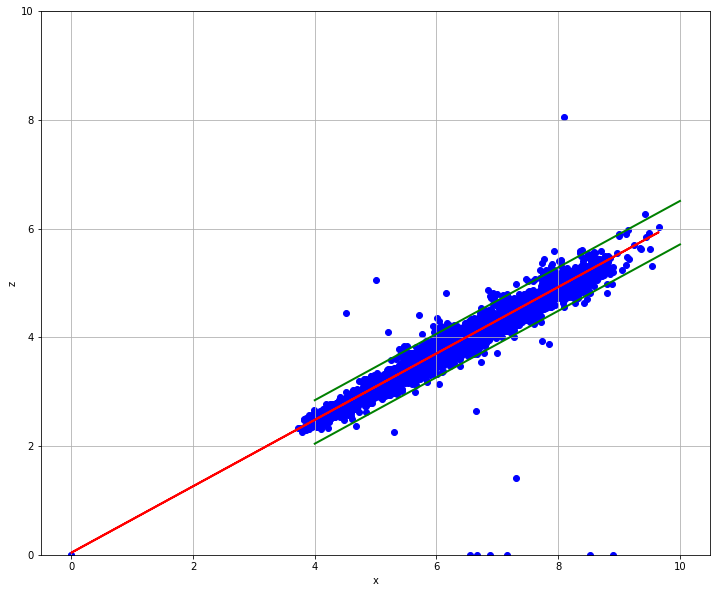

In [611]:
a, y_result = find_poly(np.column_stack([X_numeric_train[:, 3], np.matrix(np.ones(X_numeric_train.shape[0])).T]), X_numeric_train[:, 5])
print("z = x * {0} + {1}".format(a[0,0], a[1,0]))

fig, ax = plt.subplots()

x_add = x = np.linspace(4, 10, 1000)
y_add = a[0, 0] * x_add - 0.4
y_add1 = a[0, 0] * x_add + 0.4

ax.scatter(X_numeric_train[:, 3], X_numeric_train[:, 5], color="b")
ax.plot(X_new_num_train[:, 3], y_result, linewidth=2.0, color="r")
ax.plot(x_add, y_add, linewidth=2.0, color="g")
ax.plot(x_add, y_add1, linewidth=2.0, color="g")

plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("z")
plt.grid(True)
fig.set_size_inches(12, 10)

plt.show()

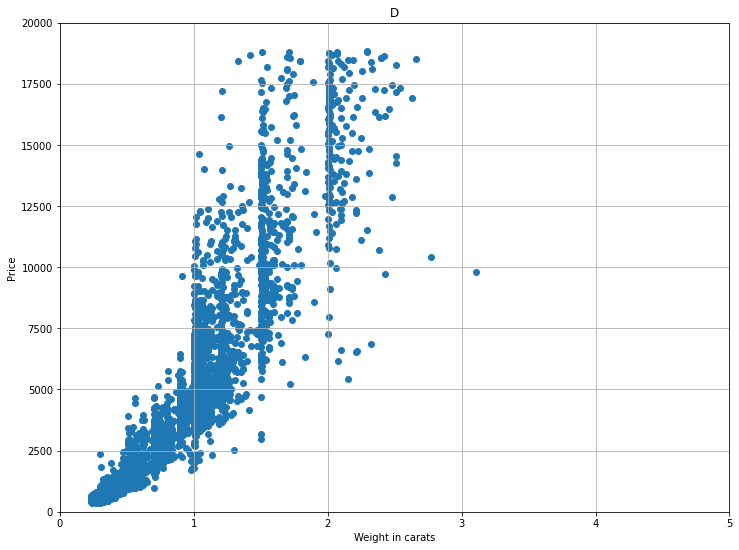

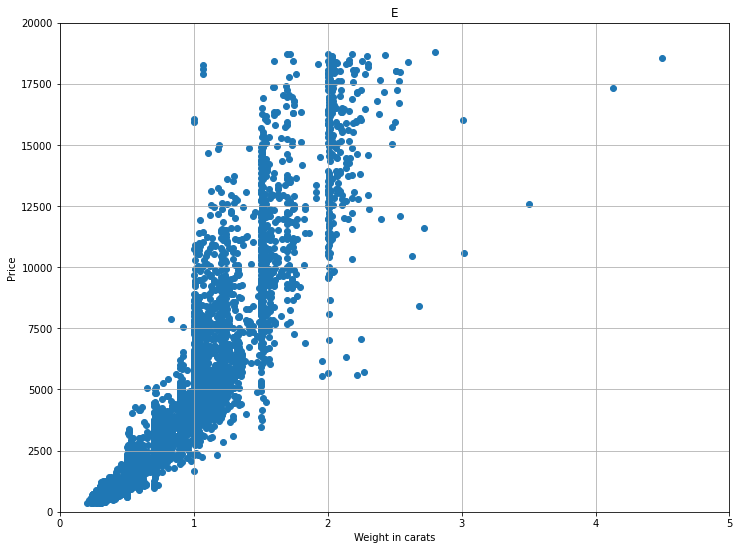

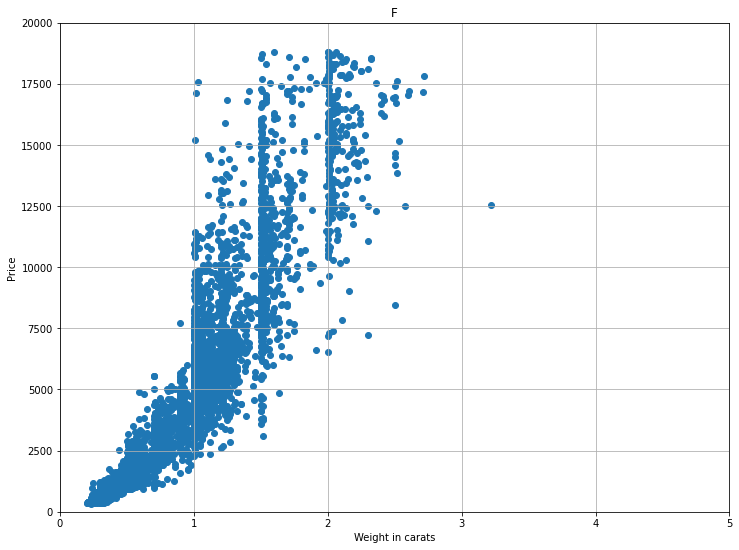

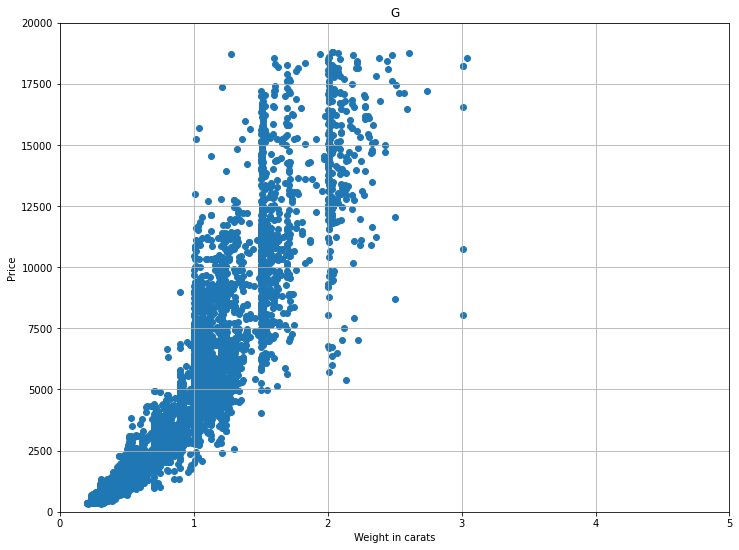

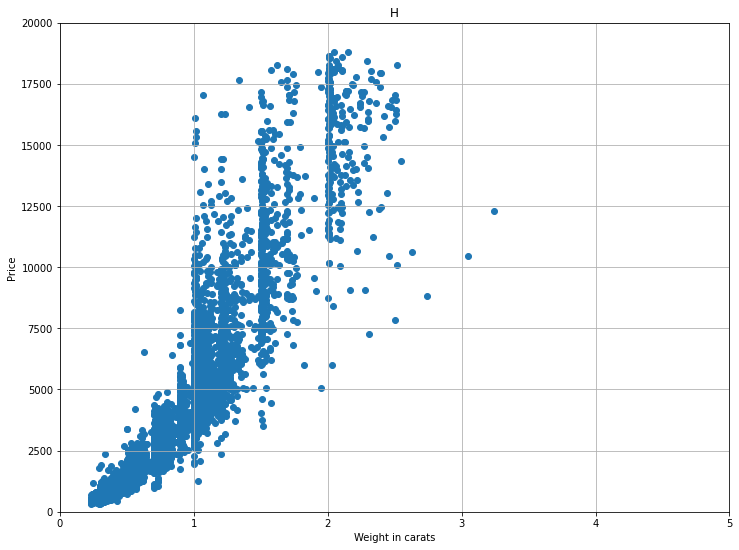

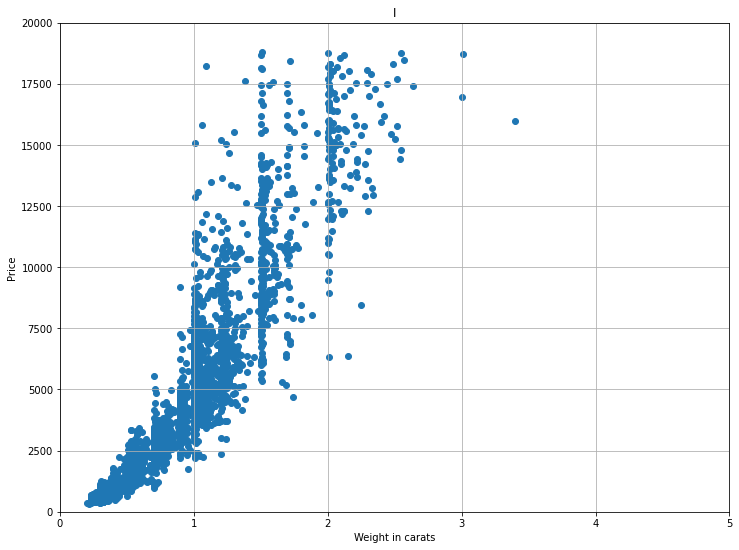

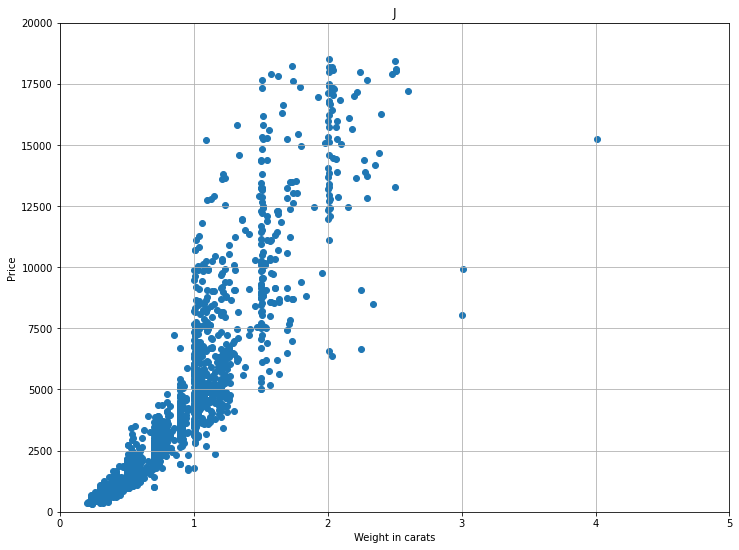

In [1155]:
# Исследуем зависимость цены от веса и цвета

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X_color_train = enc.fit_transform(X_categorical_train[:, [1]])
X_color_test = enc.fit_transform(X_categorical_test[:, [1]])
X_color = vstack([X_color_train, X_color_test])

enc = OrdinalEncoder()
X_cut_train = enc.fit_transform(X_categorical_train[:, [2]])
X_cut_test = enc.fit_transform(X_categorical_test[:, [2]])
X_cut = vstack([X_cut_train, X_cut_test])

for cc in range(ord('D'), ord('K')):
    c = chr(cc)
    d = numeric_data[:,0]
    x = [d[i] for i in range(len(d)) if X_color[i] == ord(c) - ord('D')]
    yy = [y[i] for i in range(len(d)) if X_color[i] == ord(c) - ord('D')]
    fig, ax = plt.subplots()
    ax.scatter(x, yy)
    fig = plt.gcf()
    fig.set_size_inches(12, 9)
    plt.xlabel("Weight in carats")
    plt.ylabel("Price")
    plt.title(c)
    plt.ylim(0, 20000)
    plt.xlim(0, 5)
    plt.grid(True)

plt.show()

In [272]:
cuts = {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}
clarities = {"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7}
colors = {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J": 6}

In [1169]:
X_categorical = vstack([X_categorical_train, X_categorical_test])

cut_color = [[0 for i in range(7)] for j in range(5)]
color_cut = [[0 for i in range(5)] for j in range(7)]
cut_clarity = [[0 for i in range(8)] for j in range(5)]
clarity_cut = [[0 for i in range(5)] for j in range(8)]
color_clarity = [[0 for x in range(8)] for x in range(7)]
clarity_color = [[0 for x in range(7)] for x in range(8)]
for i in range(len(X_categorical)):
    cut_color[cuts[X_categorical[i, 0]]][ord(X_categorical[i, 1]) - ord("D")] += 1
    color_cut[colors[X_categorical[i, 1]]][cuts[X_categorical[i, 0]]] += 1
    cut_clarity[cuts[X_categorical[i, 0]]][clarities[X_categorical[i, 2]]] += 1
    clarity_cut[clarities[X_categorical[i, 2]]][cuts[X_categorical[i, 0]]] += 1
    color_clarity[colors[X_categorical[i, 1]]][clarities[X_categorical[i, 2]]] += 1
    clarity_color[clarities[X_categorical[i, 2]]][colors[X_categorical[i, 1]]] += 1
    
print("cut_color:")
for i in range(len(cut_color)):
    a = cut_color[i]
    print("Cut:", list(cuts.keys())[i], a, "Max color:", chr(a.index(max(a)) + ord("D")), ", all diamonds:", sum(a))
print()
print("color_cut:")
for i in range(len(color_cut)):
    a = color_cut[i]
    print("Color:", list(colors.keys())[i], a, "Max cut:", list(cuts.keys())[a.index(max(a))], ", all diamonds:", sum(a))
print()
print("cut_clarity:")
for i in range(len(cut_clarity)):
    a = cut_clarity[i]
    print("Cut:", list(cuts.keys())[i], a, "Max clarity:", list(clarities.keys())[a.index(max(a))], ", all diamonds:", sum(a))
print()
print("clarity_cut:")
for i in range(len(clarity_cut)):
    a = clarity_cut[i]
    print("Clarity:", list(clarities.keys())[i], a, "Max cut:", list(cuts.keys())[a.index(max(a))], ", all diamonds:", sum(a))
print()
print("color_clarity:")
for i in range(len(color_clarity)):
    a = color_clarity[i]
    print("Color:", list(colors.keys())[i], a, "Max clarity:", list(clarities.keys())[a.index(max(a))], ", all diamonds:", sum(a))
print()
print("clarity_color:")
for i in range(len(clarity_color)):
    a = clarity_color[i]
    print("Clarity:", list(clarities.keys())[i], a, "Max color:", list(colors.keys())[a.index(max(a))], ", all diamonds:", sum(a))

cut_color:
Cut: Fair [118, 162, 222, 228, 207, 125, 79] Max color: G , all diamonds: 1141
Cut: Good [474, 655, 622, 615, 504, 360, 215] Max color: E , all diamonds: 3445
Cut: Very Good [1030, 1655, 1492, 1629, 1274, 869, 490] Max color: E , all diamonds: 8439
Cut: Premium [1107, 1628, 1635, 2024, 1596, 996, 580] Max color: G , all diamonds: 9566
Cut: Ideal [1950, 2758, 2683, 3401, 2174, 1499, 629] Max color: G , all diamonds: 15094

color_cut:
Color: D [118, 474, 1030, 1107, 1950] Max cut: Ideal , all diamonds: 4679
Color: E [162, 655, 1655, 1628, 2758] Max cut: Ideal , all diamonds: 6858
Color: F [222, 622, 1492, 1635, 2683] Max cut: Ideal , all diamonds: 6654
Color: G [228, 615, 1629, 2024, 3401] Max cut: Ideal , all diamonds: 7897
Color: H [207, 504, 1274, 1596, 2174] Max cut: Ideal , all diamonds: 5755
Color: I [125, 360, 869, 996, 1499] Max cut: Ideal , all diamonds: 3849
Color: J [79, 215, 490, 580, 629] Max cut: Ideal , all diamonds: 1993

cut_clarity:
Cut: Fair [153, 332, 281, 

In [1170]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X_train_tt, X_val_tt, y_train_tt, y_val_tt = train_test_split(np.column_stack([np.ones(len(X_categorical_train)), enc.fit_transform(X_categorical_train)]), y_train, test_size=0.2, random_state=652452)
X_tt2 = np.column_stack([np.ones(len(X_test_test)), enc.fit_transform(X_test_test_categorical)])
X_testtt = np.column_stack([np.ones(len(X_categorical_test)), enc.fit_transform(X_categorical_test)])

found_lambda_tt = find_lambda(X_val_tt, y_val_tt)
poly_coefs_tt1 = find_poly_L2(X_train_tt, y_train_tt, found_lambda_tt)
poly_coefs_tt2 = find_poly(X_train_tt, y_train_tt)[0]
y_tt_results1 = X_tt2.dot(poly_coefs_tt1)
y_tt_results2 = X_tt2.dot(poly_coefs_tt2)

print("Test error with L2:    ", find_error2(X_testtt, poly_coefs_tt1, y_test))
print("Test error without L2: ", find_error2(X_testtt, poly_coefs_tt2, y_test))
print()
print("Train error with L2:   ", find_error2(X_train_tt, poly_coefs_tt1, y_train_tt))
print("Train error without L2:", find_error2(X_train_tt, poly_coefs_tt2, y_train_tt))

Minimum val error = 15631037.269993441
Needed lambda = 2 ** 0 = 1
Test error with L2:     15252194.475837559
Test error without L2:  15252145.655446464

Train error with L2:    15226662.190270249
Train error without L2: 15226661.931315335


In [1172]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.preprocessing import OrdinalEncoder

def add_feature(data, X_categor):
    data = np.column_stack([data, np.ones(len(data))])
    for i in range(len(data)):
        data[i, -1] = (X_categor[i, 0] == "Premium" and X_categor[i, 1] == "G")
    data = np.column_stack([data, np.ones(len(data))])
    for i in range(len(data)):
        data[i, -1] = (X_categor[i, 0] == "Fair" and X_categor[i, 2] in ["I1", "SI2"])
    data = np.column_stack([data, np.ones(len(data))])
    for i in range(len(data)):
        data[i, -1] = (X_categor[i, 1] == "J" and X_categor[i, 2] == "S1")
    return data

enc = OrdinalEncoder()

X_all_train = np.column_stack([np.ones(len(X_categorical_train)), enc.fit_transform(X_categorical_train)])
X_all_train = add_feature(X_all_train, X_categorical_train)

X_train_tt, X_val_tt, y_train_tt, y_val_tt = train_test_split(X_all_train, y_train, test_size=0.2, random_state=652452)
X_tt2 = np.column_stack([np.ones(len(X_test_test)), enc.fit_transform(X_test_test_categorical)])
X_tt2 = add_feature(X_tt2, X_test_test_categorical)
X_testtt = np.column_stack([np.ones(len(X_categorical_test)), enc.fit_transform(X_categorical_test)])
X_testtt = add_feature(X_testtt, X_categorical_test)

found_lambda_tt = find_lambda(X_val_tt, y_val_tt)
poly_coefs_tt1 = find_poly_L2(X_train_tt, y_train_tt, found_lambda_tt)
print("Test error with L2:    ", find_error2(X_testtt, poly_coefs_tt1, y_test))
y_tt_results1 = X_tt2.dot(poly_coefs_tt1)
print()
print("Train error with L2:   ", find_error2(X_train_tt, poly_coefs_tt1, y_train_tt))

Minimum val error = 15613456.868103083
Needed lambda = 2 ** 0 = 1
Test error with L2:     15240054.431836687

Train error with L2:    15208151.857452584


In [1173]:
def apf(features, degree):
    return add_polynomial_features(features, degree)

In [1174]:
def find_poly_qr(y, Q, R):
    a = (inv(R).dot(Q.T)).dot(np.matrix(y).T)
    return a

Cut: Fair, min price: 337.0, max_price: 18574.0
Cut: Good, min price: 335.0, max_price: 18788.0
Cut: Very Good, min price: 336.0, max_price: 18803.0
Cut: Premium, min price: 326.0, max_price: 18823.0
Cut: Ideal, min price: 326.0, max_price: 18806.0


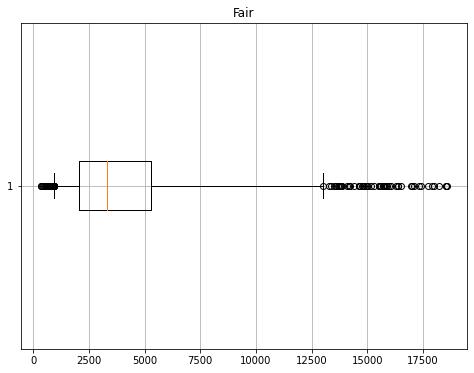

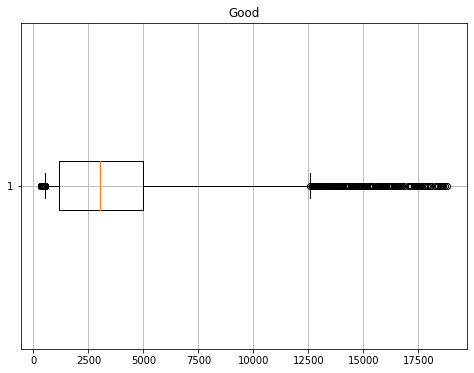

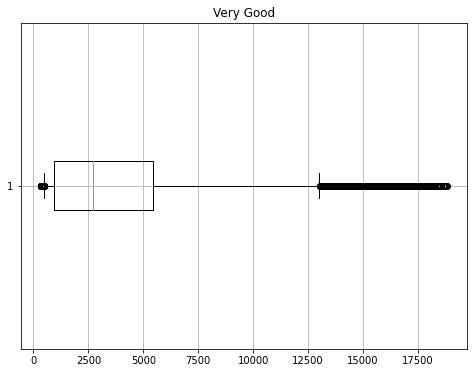

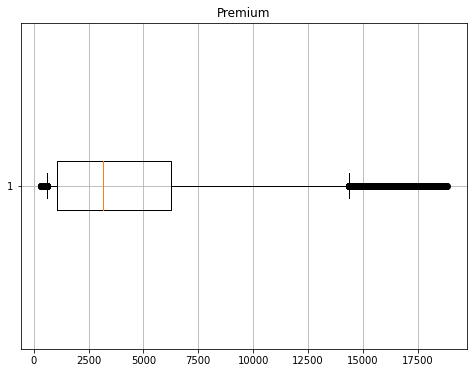

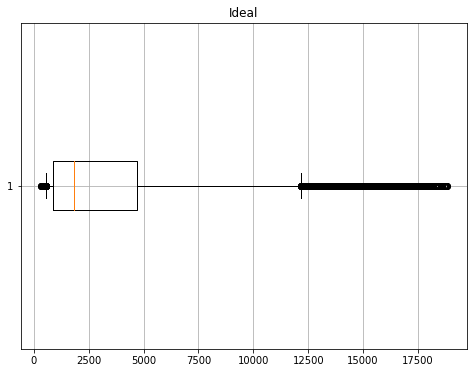

In [1175]:
cut_min_max_price = [[50000, 0] for i in range(len(cuts))]
cut_diamonds = [[] for x in range(len(cuts))]
for i in range(X.shape[0]):
    cut_min_max_price[cuts[X[i, 1]]][0] = min(cut_min_max_price[cuts[X[i, 1]]][0], float(y[i]))
    cut_min_max_price[cuts[X[i, 1]]][1] = max(cut_min_max_price[cuts[X[i, 1]]][1], float(y[i]))
    cut_diamonds[cuts[X[i, 1]]].append(float(y[i]))

for i in range(len(cuts)):
    print("Cut: {0}, min price: {1}, max_price: {2}".format(list(cuts.keys())[i], cut_min_max_price[i][0], cut_min_max_price[i][1]))
    fig, ax = plt.subplots()
    ax.boxplot(cut_diamonds[i], vert=False, whis=(5, 95))
    ax.set_title(list(cuts.keys())[i])
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.grid(True)

plt.show()

In [1176]:
X_numeric_all = vstack([X_numeric_train, X_numeric_test])
medians = np.median(X_numeric_train, axis=0)
medians = list(medians)
medians.append(np.median(y))
medians

[0.7, 61.8, 57.0, 5.7, 5.71, 3.53, 2406.0]

In [1177]:
averages = np.average(X_numeric_train, axis=0)
averages = list(averages)
averages.append(np.average(y))
averages

[0.7974396300087189,
 61.75235224989575,
 57.45307631070169,
 5.7317168960157705,
 5.735881193373518,
 3.540104249592479,
 3936.794825527398]

In [1178]:
new_X_cat_train = np.zeros(X_categorical_train.shape)
new_X_cat_test = np.zeros(X_categorical_test.shape)
new_X_cat_tt = np.zeros(X_test_test_categorical.shape)

for i in range(new_X_cat_train.shape[0]):
    new_X_cat_train[i, 0] = float(cuts[X_categorical_train[i, 0]])
    new_X_cat_train[i, 1] = float(colors[X_categorical_train[i, 1]])
    new_X_cat_train[i, 2] = float(clarities[X_categorical_train[i, 2]])

for i in range(new_X_cat_test.shape[0]):
    new_X_cat_test[i, 0] = float(cuts[X_categorical_test[i, 0]])
    new_X_cat_test[i, 1] = float(colors[X_categorical_test[i, 1]])
    new_X_cat_test[i, 2] = float(clarities[X_categorical_test[i, 2]])
    
for i in range(new_X_cat_tt.shape[0]):
    new_X_cat_tt[i, 0] = float(cuts[X_test_test_categorical[i, 0]])
    new_X_cat_tt[i, 1] = float(colors[X_test_test_categorical[i, 1]])
    new_X_cat_tt[i, 2] = float(clarities[X_test_test_categorical[i, 2]])
    
print(new_X_cat_train[:5])

[[3. 3. 3.]
 [3. 3. 5.]
 [2. 6. 1.]
 [3. 5. 1.]
 [3. 2. 1.]]


In [1179]:
perc_begin = 0.01
perc_end = 99.99

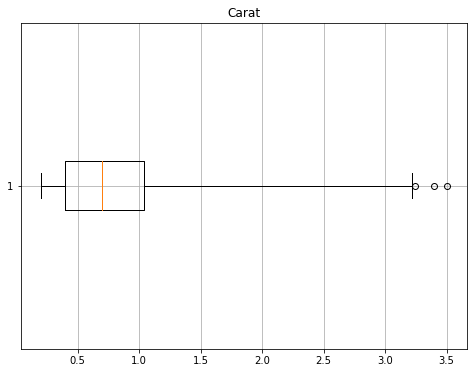

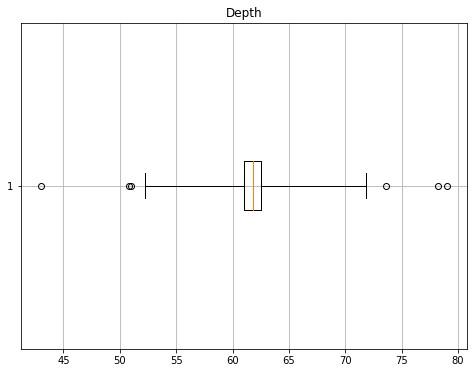

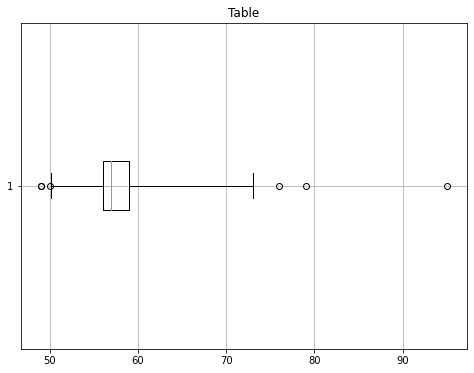

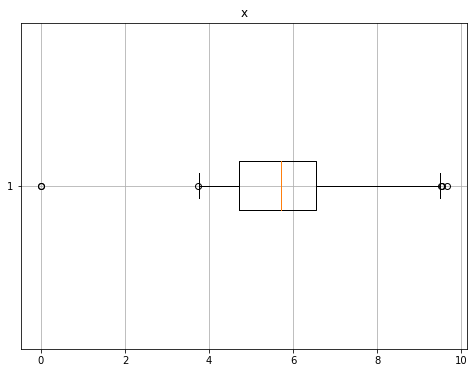

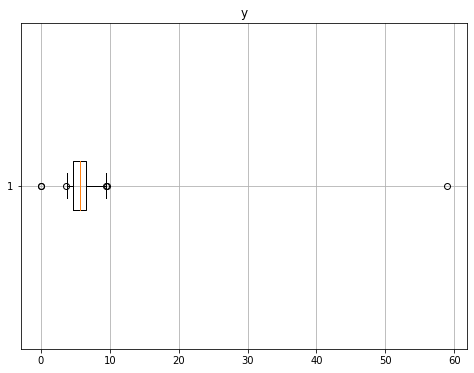

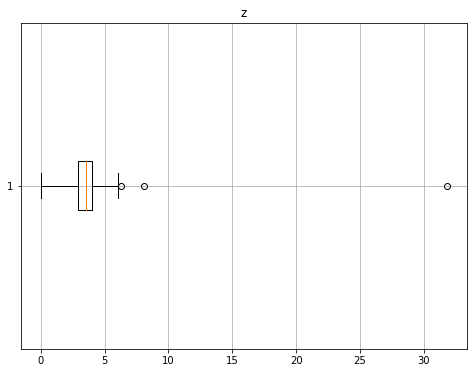

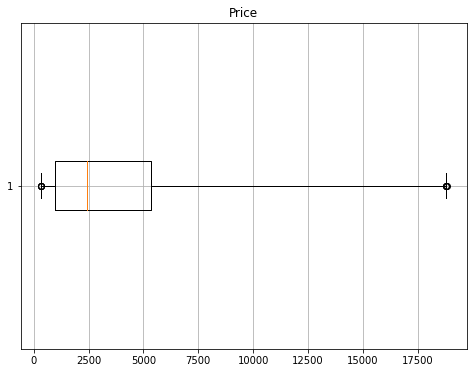

[0.2, 51.76536, 50.06378, 3.7491339999999997, 3.722756, 0.0, 336.2756]
[3.227243999999919, 72.45195999999268, 74.08659999998781, 9.497243999999919, 9.434487999999838, 6.1169279999990245, 18803.362199999996]
[0.7, 61.8, 57.0, 5.7, 5.71, 3.53, 2406.0]


In [1181]:
numeric_names = ["Carat", "Depth", "Table", "x", "y", "z"]
l_range, u_range = [0 for x in range(7)], [0 for x in range(7)]

for i in range(len(numeric_features)):
    l_range[i], u_range[i] = np.percentile(X_numeric_train[:,i], (perc_begin, perc_end))
    fig, ax = plt.subplots()
    ax.boxplot(X_numeric_train[:,i], vert=False, whis=(perc_begin, perc_end))
    ax.set_title(numeric_names[i])
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.grid(True)

l_range[6], u_range[6] = np.percentile(y_train, (perc_begin, perc_end))
fig, ax = plt.subplots()
ax.boxplot(y, vert=False, whis=(perc_begin, perc_end))
ax.set_title("Price")
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.grid(True)

plt.show()
print(l_range)
print(u_range)
print(medians)

In [1182]:
new_X_num_train = np.copy(X_numeric_train)
new_X_num_test = np.copy(X_numeric_test)
new_X_num_tt = np.copy(X_test_test_numeric)
cnt_train = set()
cnt_test = set()
cnt_tt = set()
for i in range(new_X_num_train.shape[0]):
    for j in range(len(numeric_features)):
        if new_X_num_train[i, j] < l_range[j]:
            new_X_num_train[i, j] = l_range[j]
            cnt_train.add(i)
        if new_X_num_train[i, j] > u_range[j]:
            new_X_num_train[i, j] = u_range[j]
            cnt_train.add(i)

for i in range(new_X_num_test.shape[0]):
    for j in range(len(numeric_features)):
        if new_X_num_test[i, j] < l_range[j]:
            new_X_num_test[i, j] = l_range[j]
            cnt_test.add(i)
        if new_X_num_test[i, j] > u_range[j]:
            new_X_num_test[i, j] = u_range[j]
            cnt_test.add(i)
    
for i in range(new_X_num_tt.shape[0]):
    for j in range(len(numeric_features)):
        if new_X_num_tt[i, j] < l_range[j]:
            new_X_num_tt[i, j] = l_range[j]
            cnt_tt.add(i)
        if new_X_num_tt[i, j] > u_range[j]:
            new_X_num_tt[i, j] = u_range[j]
            cnt_tt.add(i)
    
print(len(cnt_train), len(cnt_test), len(cnt_tt))
print(new_X_num_train[:5])

22 7 18
[[ 0.57 59.7  59.    5.37  5.41  3.22]
 [ 0.32 60.8  59.    4.41  4.44  2.69]
 [ 1.2  61.8  56.    6.81  6.85  4.22]
 [ 1.53 62.1  59.    7.35  7.37  4.57]
 [ 0.51 58.1  59.    5.26  5.24  3.05]]


In [1183]:
def change_y(data): # y = x * 0.9916949172058404 + 0.0500095651807048
    y_coeficents = [0.9916949172058404, 0.0500095651807048]
    data_width = data.shape[1]
    data_new = np.copy(data)
    for i in range(len(data_new)):
        data_new[i, 4] = data_new[i, 3] * y_coeficents[0] + y_coeficents[1]
    return data_new

In [1184]:
def change_z(data): # z = x * 0.6109449971384449 + 0.038340486957745015
    z_coeficents = [0.6109449971384449, 0.038340486957745015]
    data_width = data.shape[1]
    data_new = np.copy(data)
    for i in range(len(data_new)):
        data_new[i, 5] = data_new[i, 5] * z_coeficents[0] + z_coeficents[1]
    return data_new

In [1185]:
new_X_num_train1 = change_y(new_X_num_train)
new_X_num_test1 = change_y(new_X_num_test)
new_X_num_tt1 = change_y(new_X_num_tt)

In [1186]:
new_X_num_train2 = change_z(new_X_num_train1)
new_X_num_test2 = change_z(new_X_num_test1)
new_X_num_tt2 = change_z(new_X_num_tt1)

In [1201]:
run_model20()

# Test error with L2:     494719.2738920158
# Test error with QR:     2401698.1380806044

# Train error with L2:    29795326.602660757
# Train error with QR:    43249127.895614095

Minimum val error = 0.014451467034198364
Needed lambda = 2 ** 0 = 1
Test error with L2:     477502.7043821681
Test error with QR:     1144935.0702758345

Train error with L2:    29826694.116887424
Train error with QR:    34430448.17717932



(matrix([[15066.26358241],
         [11179.64810078],
         [  776.09825883],
         ...,
         [  659.41151095],
         [ 3515.70343779],
         [ 2508.80425702]]),
 matrix([[12868.7955509 ],
         [11230.22349086],
         [  825.12559979],
         ...,
         [  562.97065219],
         [ 3220.38443265],
         [ 3029.43977618]]))

In [ ]:
def post_processing(results, needed_cnt):
    for i in needed_cnt:
        results[i] = medians[6]
    return results

In [1188]:
def add_feature(data, X_categor):
    data = np.column_stack([data, np.ones(len(data))])
    for i in range(len(data)):
        data[i, -1] = (X_categor[i, 0] == "Ideal" and X_categor[i, 1] == "G")
    data = np.column_stack([data, np.ones(len(data))])
    for i in range(len(data)):
        data[i, -1] = (X_categor[i, 0] == "Fair" and X_categor[i, 2] in ["I1", "SI2"])
    data = np.column_stack([data, np.ones(len(data))])
    for i in range(len(data)):
        data[i, -1] = (X_categor[i, 1] == "J" and X_categor[i, 2] == "I1")
    return data

In [1189]:
def find_error_by_results(results, answer):
    dif = results - np.matrix(answer).T
    y2 = np.multiply(dif, dif)
    err = np.sum(y2) / len(y2)
    return err

In [1190]:
def find_place(arr, x):
    for i in range(len(arr)):
        if x < arr[i]:
            return i
    return len(arr)

In [1191]:
def add_table_type(data, ind): # 51 - 69/68, ind = 12
    left_tables = [i for i in range(51, 69)]
    data_width = data.shape[1]
    data_new = np.column_stack([data, np.zeros((len(data), len(left_tables) + 1))])
    for i in range(len(data_new)):
        new_place = find_place(left_tables, float(data_new[i, ind]))
        data_new[i, data_width + new_place] = 1
    return data_new

In [1490]:
def add_depth_type(data, ind): # 57.5, 60, 64, 67, ind = 11
    left_depths = [55, 57.5, 60, 64, 65.5, 67]
    data_width = data.shape[1]
    data_new = np.column_stack([data, np.zeros((len(data), len(left_depths) + 1))])
    for i in range(len(data_new)):
        new_place = find_place(left_depths, float(data_new[i, ind]))
        data_new[i, data_width + new_place] = 1
    return data_new

In [1485]:
def add_weight_type(data, ind): # 0.5, 0.8, 1, 1.5, 2, 2.5, ind = 10
    left_weights = [0.5, 0.8, 1, 1.5, 2, 2.5]
    data_width = data.shape[1]
    data_new = np.column_stack([data, np.zeros((len(data), len(left_weights) + 1))])
    for i in range(len(data_new)):
        new_place = find_place(left_weights, float(data_new[i, ind]))
        data_new[i, data_width + new_place] = 1
    return data_new

In [1483]:
def add_x_type(data, new_X_num1):
    left_x = [3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]
    data_width = data.shape[1]
    data_new = np.column_stack([data, np.zeros((len(data), len(left_x) + 1))])
    for i in range(len(data_new)):
        new_place = find_place(left_x, float(new_X_num1[i, 3]))
        data_new[i, data_width + new_place] = 1
    return data_new

In [1525]:
l_range[4], u_range[4]

(3.722756, 9.434487999999838)

In [1526]:
def add_y_type(data, new_X_num1):
    left_y = [4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]
    data_width = data.shape[1]
    data_new = np.column_stack([data, np.zeros((len(data), len(left_y) + 1))])
    for i in range(len(data_new)):
        new_place = find_place(left_y, float(new_X_num1[i, 4]))
        data_new[i, data_width + new_place] = 1
    return data_new

In [1194]:
def change_zero_xyz(data):
    data_new = np.copy(data)
    for i in range(data.shape[0]):
        if data[i, 3] == 0:
            data_new[i, 3] = l_range[3]
        if data[i, 4] == 0:
            data_new[i, 4] = l_range[4]
        if data[i, 5] == 0:
            data_new[i, 5] = l_range[5]
    return data_new

In [1195]:
def get_results(X, pc1, pc2, pc3):
    result1 = X.dot(pc1)
    result2 = X.dot(pc2)
    result3 = X.dot(pc3)
    return result1, result2, result3

In [1491]:
y_test_results1, y_test_results3 = run_model20()

Minimum val error = 0.014469049461986568
Needed lambda = 2 ** 0 = 1
Test error with L2:     458782.9247283438
Test error with QR:     458782.9247283438

Train error with L2:    29961831.62976583
Train error with QR:    29961831.62976583



18795.0 326.0
['2.01' 'Good' 'H' 'SI2' '64.0' '51.0' '8.08' '8.01' '5.15'] 15888.0 [11150.70888652] 207.47816066358368
['2.46' 'Premium' 'E' 'SI2' '59.7' '59.0' '8.82' '8.76' '5.25'] 10470.0 [16733.] 251.83335560681755
['2.0' 'Premium' 'J' 'VS1' '63.0' '58.0' '8.04' '7.99' '5.05'] 9296.0 [15140.14524575] 201.49433321154217
['2.05' 'Premium' 'I' 'VS1' '60.3' '59.0' '8.25' '8.21' '4.96'] 12766.0 [17830.17570045] 208.38993515263468
['2.24' 'Premium' 'J' 'VS1' '60.9' '58.0' '8.46' '8.41' '5.14'] 11970.0 [16867.39823487] 226.95274824353925
['2.01' 'Premium' 'H' 'VS2' '62.6' '59.0' '8.02' '7.88' '4.98'] 13599.0 [18739.14316309] 197.75119384167618
['2.02' 'Premium' 'I' 'VS2' '61.2' '60.0' '8.22' '8.13' '5.0'] 11059.0 [15647.77716104] 208.52926998911576
105
dict_keys(['D', 'E', 'F', 'G', 'H', 'I', 'J'])


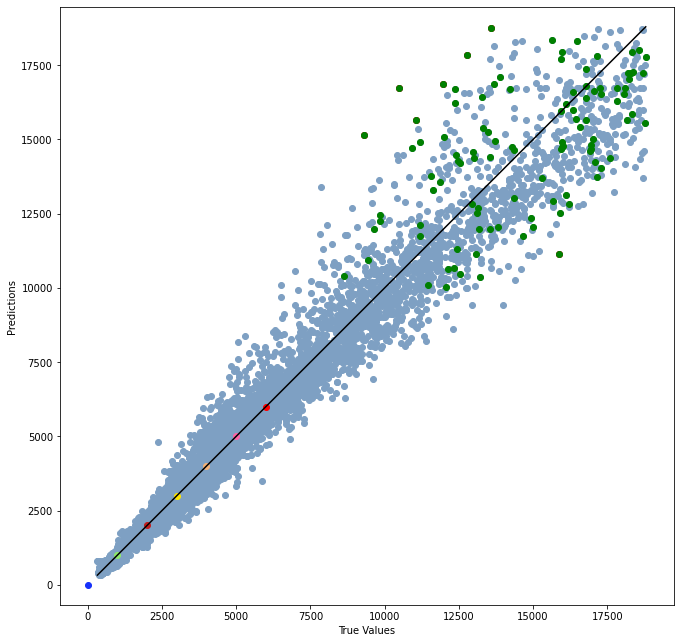

In [1563]:
plt.figure(figsize=(11, 11))
plt.scatter(y_test, y_test_results1.A1, c="#7ea0c3")

p1 = max(max(y_test_results1[0]), max(y_test))
p2 = min(min(y_test_results1[0]), min(y_test))
print(p1, p2)
plt.plot([p1, p2], [p1, p2], "k-")
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')

to_draw_x = []
to_draw_y = []
for i in range(len(X_test)):
    V = new_X_num_test2[i, 3] * new_X_num_test2[i, 4] * new_X_num_test2[i, 5]
    if abs(y_test[i] - y_test_results1[i].A1) > 4500 and X_numeric_test[i, 0] >= 2:
        to_draw_x.append(y_test[i])
        to_draw_y.append(y_test_results1[i].A1)
        print(X_test[i], y_test[i], y_test_results1[i].A1, V)
plt.scatter(to_draw_x, to_draw_y, c="r")

to_draw_x1 = []
to_draw_y1 = []

def fl1(i):
    V = new_X_num_test2[i, 3] * new_X_num_test2[i, 4] * new_X_num_test2[i, 5]
    return X_categorical_test[i, 0] == "Good" and 2.2 >= X_numeric_test[i, 0] >= 2 and X_categorical_test[i, 2] == "SI2" and X_numeric_test[i, 1] >= 64 and 210 >= V >= 205

for i in range(len(X_test)):
    V = new_X_num_test2[i, 3] * new_X_num_test2[i, 4] * new_X_num_test2[i, 5]
    if fl1(i) or (59.7 <= X_numeric_test[i, 1] <= 63 and 255 >= V >= 197 and 2.5 >= X_numeric_test[i, 0] >= 2 and X_categorical_test[i, 0] in ["Premium"] and X_categorical_test[i, 2] in ["SI2", "VS1", "VS2"]):
        to_draw_x1.append(y_test[i])
        to_draw_y1.append(y_test_results1[i].A1)
plt.scatter(to_draw_x1, to_draw_y1, c="g")
print(len(to_draw_x1))

print(colors.keys())
for i in range(len(color_dots[:7])):
    plt.scatter(1000 * i, 1000 * i, c=color_dots[i])
plt.show()

In [1196]:
y_between = []
y_between_much = []
for i in range(len(y_train)):
    if y_train[i] < 10 ** 3.2:
        y_between.append(y_train[i])
    if y_train[i] > 15000:
        y_between_much.append(y_train[i])
median_between = np.median(y_between)
median_between_much = np.median(y_between_much)
median_between, median_between_much

(810.0, 16733.0)

In [1197]:
def remove_zeros_from_res(results):
    for i in range(len(results)):
        if results[i] < l_range[6]:
            results[i] = median_between
        if results[i] > u_range[6]:
            results[i] = median_between_much
    return results

In [1198]:
def get_results2(X, pc1, pc2, pc3):
    result1 = remove_zeros_from_res(X.dot(pc1))
    result2 = remove_zeros_from_res(X.dot(pc2))
    result3 = remove_zeros_from_res(X.dot(pc3))
    return result1, result2, result3

In [1199]:
def get_results3(X, pc1, pc3):
    result1 = remove_zeros_from_res(np.exp(X.dot(pc1)))
    result3 = remove_zeros_from_res(np.exp(X.dot(pc3)))
    return result1, result3

In [1570]:
y_test_results1, y_test_results3 = run_model20()
y_tt_results1, y_tt_results3 = run_model20_all_data()

# Test error with L2:     458782.9247283438
# Test error with QR:     458782.9247283438

# Train error with L2:    29961831.62976583
# Train error with QR:    29961831.62976583

Minimum val error = 0.014469029770517413
Needed lambda = 2 ** 0 = 1
Test error with L2:     459166.73229505966
Test error with QR:     459166.73229505966

Train error with L2:    29961792.333840415
Train error with QR:    29961792.333840415

Minimum val error = 0.014668769577153592
Needed lambda = 2 ** 0 = 1
Test error with L2:     454769.31072979094
Test error with QR:     454769.31072979094

Train error with L2:    29947239.70734931
Train error with QR:    29947239.70734931


In [1282]:
def add_feature3(X_categor, new_X_num1):
    feature3 = np.matrix(np.ones(len(X_categor))).T
    for i in range(len(X_categor)):
        feature3[i, 0] = (X_categor[i, 0] in ["Good", "Very Good", "Premium"] and X_categor[i, 1] == "D" and \
                          X_categor[i, 2] == "IF" and new_X_num1[i, 0] >= 1)
    return feature3

In [1569]:
def add_feature4(X_categor, new_X_num1):
    feature4 = np.matrix(np.ones(len(X_categor))).T
    for i in range(len(X_categor)):
        V = new_X_num1[i, 3] * new_X_num1[i, 4] * new_X_num1[i, 5]
        fl = (X_categor[i, 0] == "Good" and 2.2 >= new_X_num1[i, 0] >= 2 and X_categor[i, 2] == "SI2" and \
              new_X_num1[i, 1] >= 64 and 210 >= V >= 205)
        feature4[i, 0] = (fl or (59.7 <= new_X_num1[i, 1] <= 63 and 255 >= V >= 197 and \
                          2.5 >= new_X_num1[i, 0] >= 2 and X_categor[i, 0] == "Premium" and \
                          X_categor[i, 2] in ["SI2", "VS1", "VS2"]))
    return feature4

In [1565]:
# Model20

from sklearn.preprocessing import OneHotEncoder
from numpy.linalg import qr

def make_dataX(new_X_num1, X_categ):
    enc = OneHotEncoder(handle_unknown='ignore')
    X_ohe = enc.fit_transform(X_categ).toarray()
    X_add_cat = np.column_stack([np.ones(len(X_categ)), X_ohe])
    X_add_cat = add_feature(X_add_cat, X_categ)
    X_poly_xyz = np.column_stack([np.exp(new_X_num1[:, [3, 4, 5]]), new_X_num1[:, [0]]])
    X_02 = apf(new_X_num1[:, [0, 2]].T, 3).T
    X_15 = apf(new_X_num1[:, [1, 5]].T, 4).T
    X_12 = apf(new_X_num1[:, [4, 2]].T, 4).T
    X_all = np.column_stack([X_add_cat, X_poly_xyz, new_X_num1[:, [1, 2]]])
    X_all = add_table_type(X_all, 29) # 2
    X_all = add_depth_type(X_all, 28) # 1
    X_all = add_weight_type(X_all, 27) # 0
    X_all = np.delete(X_all, 28, axis=1) # 1
    X_all = add_x_type(X_all, new_X_num1) # 3
    X_all = np.column_stack([X_all, X_02, X_15, X_12, add_feature3(X_categ, new_X_num1), add_feature4(X_categ, new_X_num1)])
    return X_all

def run_model20():
    X_all_train = make_dataX(new_X_num_train2, X_categorical_train)
    X_tt2 = make_dataX(new_X_num_tt2, X_test_test_categorical)
    X_testtt = make_dataX(new_X_num_test2, X_categorical_test)
    y_log_train1 = np.log(y_train)
    X_train_tt, X_val_tt, y_train_tt, y_val_tt = train_test_split(X_all_train, y_log_train1, test_size=0.2, random_state=12345678)
    
    found_lambda_tt = find_lambda(X_val_tt, y_val_tt)
    poly_coefs_tt1 = find_poly_L2(X_train_tt, y_train_tt, found_lambda_tt)
#     Q_train_tt, R_train_tt = qr(X_train_tt)
#     poly_coefs_tt3 = find_poly_qr(y_train_tt, Q_train_tt, R_train_tt)

    y_tt_results1, y_tt_results3 = get_results3(X_tt2, poly_coefs_tt1, poly_coefs_tt1)
    y_test_results1, y_test_results3 = get_results3(X_testtt, poly_coefs_tt1, poly_coefs_tt1)
    y_train_results1, y_train_results3 = get_results3(X_train_tt, poly_coefs_tt1, poly_coefs_tt1)
    
    print("Test error with L2:    ", find_error_by_results(y_test_results1, y_test))
    print("Test error with QR:    ", find_error_by_results(y_test_results3, y_test))
    print()
    print("Train error with L2:   ", find_error_by_results(y_train_results1, y_train_tt))
    print("Train error with QR:   ", find_error_by_results(y_train_results3, y_train_tt))
    print()
    return y_test_results1, y_test_results3

def run_model20_all_data():
    X_all_train = make_dataX(new_X_num_train2, X_categorical_train)
    X_tt2 = make_dataX(new_X_num_tt2, X_test_test_categorical)
    X_testtt = make_dataX(new_X_num_test2, X_categorical_test)
    X_all_all_data = vstack([X_all_train, X_testtt])
    y_all_all_data = hstack([y_train, y_test])
    y_log_all_data = np.log(y_all_all_data)

    X_train_tt, X_val_tt, y_train_tt, y_val_tt = train_test_split(X_all_all_data, y_log_all_data, test_size=0.2, random_state=27358)

    found_lambda_tt = find_lambda(X_val_tt, y_val_tt)
    poly_coefs_tt1 = find_poly_L2(X_train_tt, y_train_tt, found_lambda_tt)
#     Q_train_tt, R_train_tt = qr(X_train_tt)
#     poly_coefs_tt3 = find_poly_qr(y_train_tt, Q_train_tt, R_train_tt)

    y_tt_results1, y_tt_results3 = get_results3(X_tt2, poly_coefs_tt1, poly_coefs_tt1)
    y_test_results1, y_test_results3 = get_results3(X_testtt, poly_coefs_tt1, poly_coefs_tt1)
    y_train_results1, y_train_results3 = get_results3(X_train_tt, poly_coefs_tt1, poly_coefs_tt1)
    
    print("Test error with L2:    ", find_error_by_results(y_test_results1, y_test))
    print("Test error with QR:    ", find_error_by_results(y_test_results3, y_test))
    print()
    print("Train error with L2:   ", find_error_by_results(y_train_results1, y_train_tt))
    print("Train error with QR:   ", find_error_by_results(y_train_results3, y_train_tt))
    return y_tt_results1, y_tt_results3

# Was:
# Test error with L2:    1220239.1237989783   with 4
# Test error without L2: 7836302128.168925
# Test error with QR:    1254011.7252324112

# Train error with L2:    1213183.464665018
# Train error without L2: 6581021991.857722
# Train error with QR:    1240977.3923491677

In [1571]:
def make_submission(y_pred):
  file = np.arange(1, len(y_pred) + 1)
  file = file.reshape(-1, 1)
  file = np.concatenate([file, y_pred.reshape(-1, 1).astype(float)], axis=1)
  with open("submission_model20_tt1.csv", "w") as f:
    f.write("id,price\n")
    np.savetxt(f, file, delimiter=",", fmt="%d,%10.5f")

make_submission(y_tt_results1)

### Task 3. Regularisation



**1.** Implement an `add_polynomial_features` function that takes an array of features and a degree and returns the polynomial features of the given degree.

In [1203]:
from sklearn.preprocessing import PolynomialFeatures

def add_polynomial_features(features, degree):
    """
      features: features array
      degree:   degree (int)
    """
  # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    
    if degree == 1:
        return features
    
    poly_prev = PolynomialFeatures(degree - 1).fit_transform(features.T)
    poly = PolynomialFeatures(degree).fit_transform(features.T)
    return poly[:, poly_prev.shape[1]:].T

    raise NotImplementedError()

# Example: get polynomial features of degree 2 based on x, y, z:
poly_features = add_polynomial_features(data[:, [6, 7, 8]].astype(np.float64).T, 2)

assert poly_features.shape[0] == 6

Train a linear model by adding polynomial features of degree $2$ from features "carat" and "table" to the sample.

In [1205]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X_train_add = np.column_stack([X_train_all, add_polynomial_features(X_numeric_train[:, [0, 2]].T, 2).T])
X_test_add = np.column_stack([X_test_all, add_polynomial_features(X_numeric_test[:, [0, 2]].T, 2).T])
poly_coefs_add = find_poly(X_train_add, y_train)[0]
print("Coefs:\n", poly_coefs_add)
print("Test erorr: ", find_error2(X_test_add, poly_coefs_add, y_test))
print("Train error:", find_error2(X_train_add, poly_coefs_add, y_train))

Coefs:
 [[ 3.12679793e+04]
 [ 6.97217557e+01]
 [-2.70080117e+02]
 [ 2.83927275e+02]
 [ 1.98696308e+04]
 [-2.32821546e+02]
 [-2.83291565e+02]
 [-2.79770740e+03]
 [-1.22027017e+01]
 [-1.76691907e+01]
 [-1.19479589e+03]
 [-4.17470775e+01]
 [ 1.82198574e+00]]
Test erorr:  1849808.6878090373
Train error: 1738121.6078017734


Previous:

    Test erorr:  1921575.4083945344
    Train error: 1763324.166129563
        
Current:
    
    Test erorr:  1849808.6878090373
    Train error: 1738121.6078017734
        
Error became much more smaller

**2.** In this task, you need to train 6 linear models on polynomial features of degrees from 1 to 6 from the existing features (carat, x, y, z). Draw a graph of the quality of the model on the training and test sets as a function of the degree of polynomial features on a logarithmic scale.

In [1206]:
def print_model(X_test, X_train, y_test, y_train):
    poly_coefs = find_poly(X_train, y_train)[0]
    test_error = find_error2(X_test, poly_coefs, y_test)
    train_error = find_error2(X_train, poly_coefs, y_train)
    print("Test erorr: ", test_error)
    print("Train error:", train_error)
    return test_error, train_error

Degree 1:
Test erorr:  2416432.8231070386
Train error: 2273721.6772205676


Degree 2:
Test erorr:  2294514.3766355263
Train error: 2077509.051438289


Degree 3:
Test erorr:  2281692.8984630206
Train error: 1968030.9827730276


Degree 4:
Test erorr:  318346906.05966604
Train error: 38647018.6205692


Degree 5:
Test erorr:  663916410674.0457
Train error: 184133026742.11414


Degree 6:
Test erorr:  1248615083436.7427
Train error: 287643936036.2714


Degree 7:
Test erorr:  1196402430940.1497
Train error: 13996987973.476755


Degree 8:
Test erorr:  1631782365317508.8
Train error: 5083232476860.661


Degree 9:
Test erorr:  45664057563669.84
Train error: 17228851004.09652


Лучший результат - у степени 3


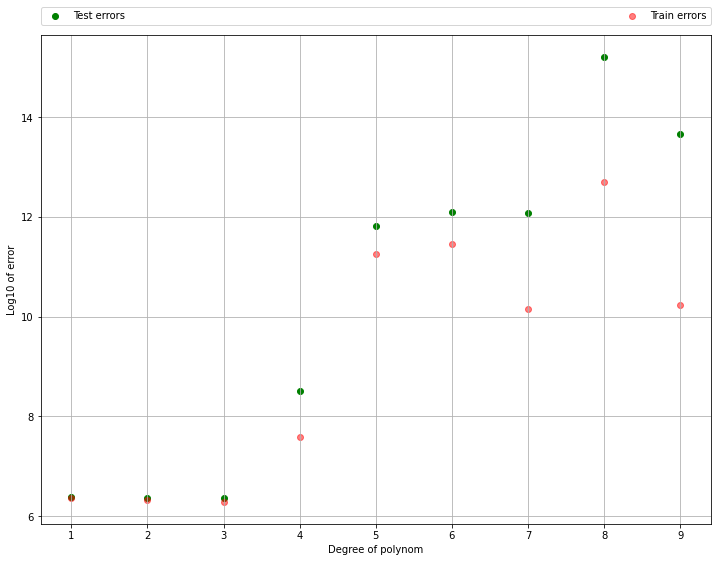

Конечно, неожиданно, что с увеличением степени на 1 - от 3 до 4 - так сильно изменился порядок ошибки


In [1207]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

test_errors = [0 for x in range(9)]
train_errors = [0 for x in range(9)]

for i in range(1, 10):
    X_carat_xyz_train = np.column_stack([np.ones(len(X_categorical_train)), add_polynomial_features(X_numeric_train[:, [0, 3, 4, 5]].T, i).T])
    X_carat_xyz_test = np.column_stack([np.ones(len(X_categorical_test)), add_polynomial_features(X_numeric_test[:, [0, 3, 4, 5]].T, i).T])
    print("Degree {0}:".format(i))
    test_errors[i - 1], train_errors[i - 1] = print_model(X_carat_xyz_test, X_carat_xyz_train, y_test, y_train)
    print("\n")

print("Best result - degree 3")

fig, ax = plt.subplots()

ax.scatter([i for i in range(1, 10)], np.log10(test_errors), color="g", label="Test errors")
ax.scatter([i for i in range(1, 10)], np.log10(train_errors), color="r", alpha=0.5, label="Train errors")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel("Log10 of error")
plt.xlabel("Degree of polynom")
plt.grid(True)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=2, mode="expand", borderaxespad=0.)

plt.show()

print("Of course, it is unexpected that as the degree increases by 1 - from 3 to 4 - the order of the error changes so much")

According to the test one, it is clear that there is no need to select a parameter, because the test one is just for tests, that is, in order to test the already selected parameter along with the trained model. According to the training - to reduce the chance of a situation where all points of the training sample are somehow different from the test one, and the model is well trained, but does not work well, simply because it does not know how to work with such data as the test ones. And by adding a validation set, we kind of add another group of points, increasing the variety and then looking at how our model works on the training set

**4.** Impliment regularisation

In [1208]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.model_selection import train_test_split

X_train2, X_val, y_train2, y_val = train_test_split(np.column_stack([np.ones(len(X_categorical_train)), add_polynomial_features(X_numeric_train[:, [0, 3, 4, 5]].T, 4).T]), y_train, test_size=0.2, random_state=652452)
X_test2 = np.column_stack([np.ones(len(X_categorical_test)), add_polynomial_features(X_numeric_test[:, [0, 3, 4, 5]].T, 4).T])
data_val = np.column_stack([X_val, y_val])
data_train2 = np.column_stack([X_train2, y_train2])
print(X_val.shape)
print(X_train2.shape)

(5276, 36)
(21103, 36)


In [1209]:
def find_poly_L2(X, y, L):
    a = (inv((X.T).dot(X) + L * np.eye(X.shape[1])).dot(X.T)).dot(np.matrix(y).T)
    y_result = X.dot(a)
    return a

In [1210]:
def find_lambda(X_validate, y_validate):
    val_errors1 = []
    val_errors2 = []

    for deg in range(50):
        L = 2 ** deg
        poly_coefs = find_poly_L2(X_validate, y_validate, L)
        val_errors1.append(find_error2(X_validate, poly_coefs, y_validate))

    for deg in range(50):
        L = - (2 ** deg)
        poly_coefs = find_poly_L2(X_validate, y_validate, L)
        val_errors2.append(find_error2(X_validate, poly_coefs, y_validate))

    min_error1, min_error_index1 = min(val_errors1), val_errors1.index(min(val_errors1))
    min_error2, min_error_index2 = min(val_errors2), val_errors2.index(min(val_errors2))
    degree = 0
    needed_lambda = 0
    if min_error1 <= min_error2:
        degree = min_error_index1
        needed_lambda = 2 ** degree
        print("Minimum val error = {0}\nNeeded lambda = 2 ** {1} = {2}".format(min_error1, degree, needed_lambda))
    else:
        degree = min_error_index2
        needed_lambda = -2 ** degree
        print("Minimum val error = {0}\nNeeded lambda = - 2 ** {1} = {2}".format(min_error2, degree, needed_lambda))
    
    return needed_lambda

In [1214]:
needed_lambda = find_lambda(X_val, y_val)

poly_coefs_train2 = find_poly_L2(X_train2, y_train2, needed_lambda)
test_error = find_error2(X_test2, poly_coefs_train2, y_test)
train2_error = find_error2(X_train2, poly_coefs_train2, y_train2)
X_train_wo_lambda = np.column_stack([np.ones(len(X_categorical_train)), add_polynomial_features(X_numeric_train[:, [0, 3, 4, 5]].T, 4).T])
X_test_wo_lambda = np.column_stack([np.ones(len(X_categorical_test)), add_polynomial_features(X_numeric_test[:, [0, 3, 4, 5]].T, 4).T])
poly_coefs_wo_lambda = find_poly(X_train_wo_lambda, y_train)[0]
test_error_wo_lambda = find_error2(X_test_wo_lambda, poly_coefs_wo_lambda, y_test)
train_error_wo_lambda = find_error2(X_train_wo_lambda, poly_coefs_wo_lambda, y_train)
print("Test erorr: ", test_error)
print("Train error:", train2_error)
print("Test error without lambda: ", test_error_wo_lambda)
print("Train error without lambda:", train_error_wo_lambda)
print("Regularisation was very helpful! It decreased an error in {0} times".format(test_error_wo_lambda / test_error))

Minimum val error = 1953629.3808617312
Needed lambda = 2 ** 0 = 1
Test erorr:  2144816.792354282
Train error: 1876500.7198893744
Test error without lambda:  318346906.05966604
Train error without lambda: 38647018.6205692
Регуляризация очень помогла! Она уменьшила ошибку в 148.42615331737915 раз


**5.** Repeat the first task, but instead of 6 regular linear models, train 6 regularized linear models.

Degree 1
Minimum val error = 2241528.834027685
Needed lambda = 2 ** 0 = 1
Test erorr for degree 1: 2393107.6858186754
Train error for degree 1: 2257216.472521639

Degree 2
Minimum val error = 2076602.2640741882
Needed lambda = 2 ** 0 = 1
Test erorr for degree 2: 2268076.6357848113
Train error for degree 2: 2033963.9274196157

Degree 3
Minimum val error = 2001107.2257422516
Needed lambda = 2 ** 0 = 1
Test erorr for degree 3: 2203597.7759783547
Train error for degree 3: 1951575.1780678006

Degree 4
Minimum val error = 1953629.3808617312
Needed lambda = 2 ** 0 = 1
Test erorr for degree 4: 2144816.792354282
Train error for degree 4: 1876500.7198893744

Degree 5
Minimum val error = 1942277.5221388421
Needed lambda = 2 ** 2 = 4
Test erorr for degree 5: 421841141.2066672
Train error for degree 5: 25018178.996663198

Degree 6
Minimum val error = 1947636.0348168833
Needed lambda = 2 ** 8 = 256
Test erorr for degree 6: 625225518845.2728
Train error for degree 6: 58275544931.60777

Degree 7
Minim

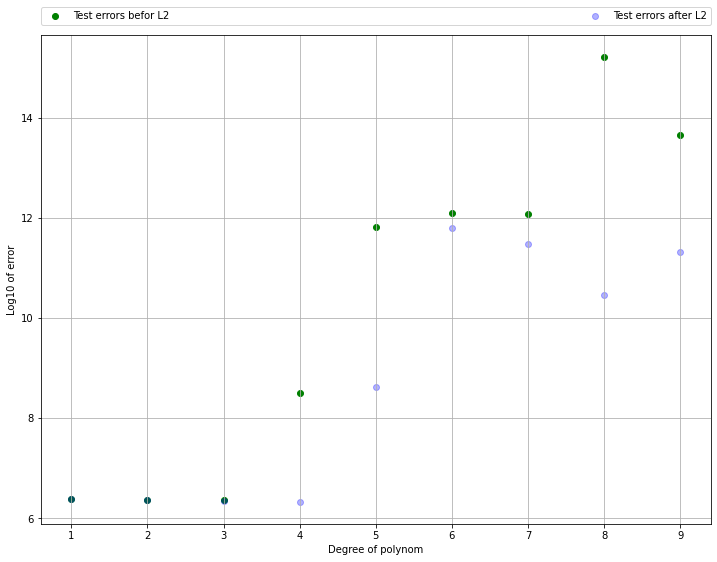

In [1216]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

reg_test_errors = []

for i in range(1, 10):
    print("Degree {0}".format(i))
    X_train2, X_val, y_train2, y_val = train_test_split(np.column_stack([np.ones(len(X_categorical_train)), apf(X_numeric_train[:, [0, 3, 4, 5]].T, i).T]), y_train, test_size=0.2, random_state=652452)
    X_test2 = np.column_stack([np.ones(len(X_categorical_test)), apf(X_numeric_test[:, [0, 3, 4, 5]].T, i).T])
    found_lambda = find_lambda(X_val, y_val)
    poly_coefs_train2 = find_poly_L2(X_train2, y_train2, found_lambda)
    test_error = find_error2(X_test2, poly_coefs_train2, y_test)
    train2_error = find_error2(X_train2, poly_coefs_train2, y_train2)
    print("Test erorr for degree {0}: {1}".format(i, test_error))
    print("Train error for degree {0}: {1}".format(i, train2_error))
    reg_test_errors.append(test_error)
    print()

print("Minimum test error: {0} (for degree {1})".format(min(reg_test_errors), reg_test_errors.index(min(reg_test_errors)) + 1))

fig, ax = plt.subplots()

ax.scatter([i for i in range(1, 10)], np.log10(test_errors), color="g", label="Test errors befor L2")
ax.scatter([i for i in range(1, 10)], np.log10(reg_test_errors), color="b", alpha=0.3, label="Test errors after L2")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel("Log10 of error")
plt.xlabel("Degree of polynom")
plt.grid(True)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=2, mode="expand", borderaxespad=0.)

plt.show()

For degrees 1, 2, and 3, the errors almost did not change; for all other degrees, the error became much smaller. Probably, this happens because after degree 3 the model has already begun to retrain and depend too much on certain features, and regularization just helps to reduce this dependence.